# Data Analysis

In [1]:
#Import the data-pipeline.ipynb file
import data_utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns

# Import the data from the data-pipeline.ipynb file

pd.options.mode.use_inf_as_na = True
csv_awardsPlayers, csv_coaches, csv_playersTeams, csv_players, csv_seriesPost, csv_teamsPost, csv_teams = data_utils.load_data()


/tmp/ipykernel_15097/2524067569.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


## Series Post Table

**year** - from 1 to 10


**round**:
    - FR - first round
    - CF - conference finals
    - F - finals


**series** - go from A to G. First-round series are A, B, C and D.  Conference Finals are E and F. Finals are G.


**tmIDWinner** - Id of the winning team.


**lgIDWinner** - Id of the league where the winning team plays.


**tmIDLoser** - Id of the losing team.


**lgIDLoser** - Id of the league where the losing team plays.


**W** - Number of games won by the winning team in the series;


**L** - Number of games won by the losing team in the series;

The distinct years are : 10
The distinct rounds are : 3
The distinct series are : 7
The distinct tmIDWinner are : 14
The distinct lgIDWinner are : 1
The distinct tmIDLoser are : 18
The distinct lgIDLoser are : 1
The distinct W are : 2
The distinct L are : 3


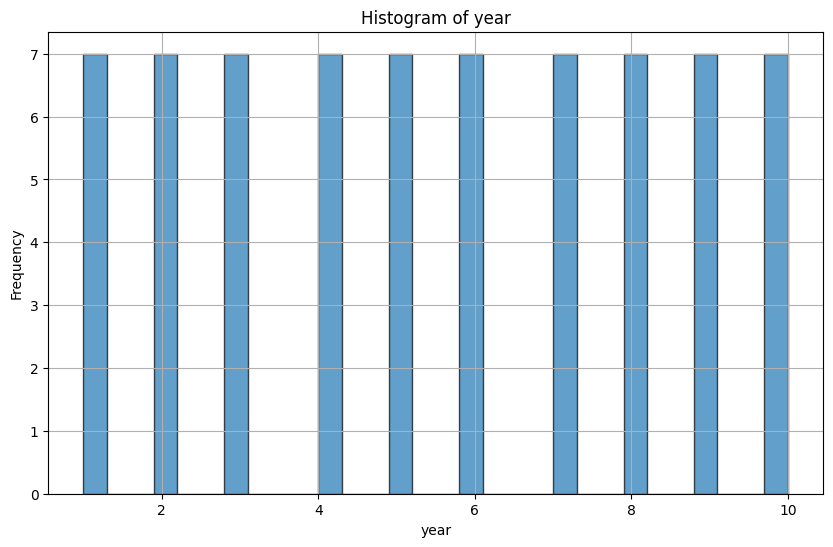

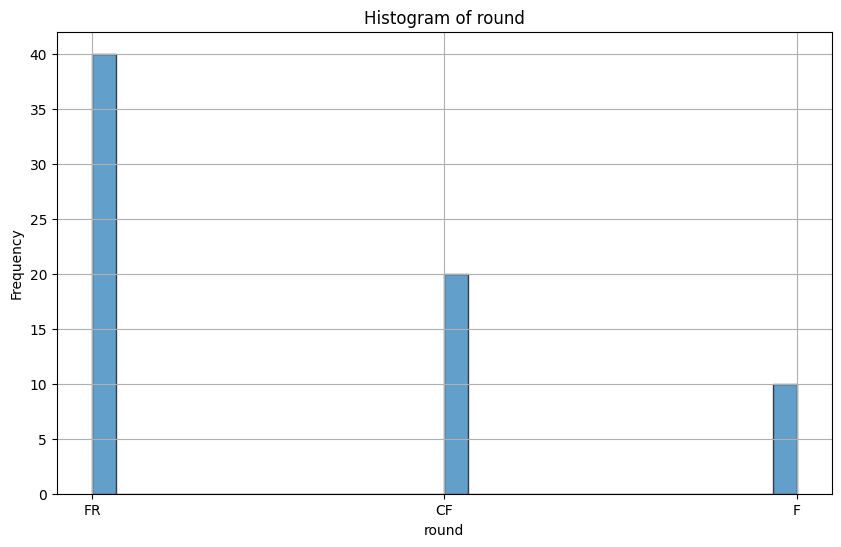

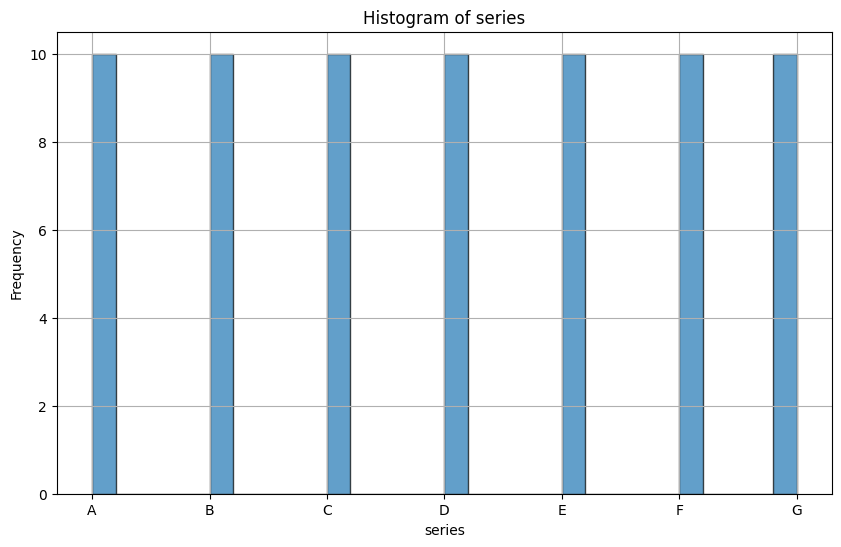

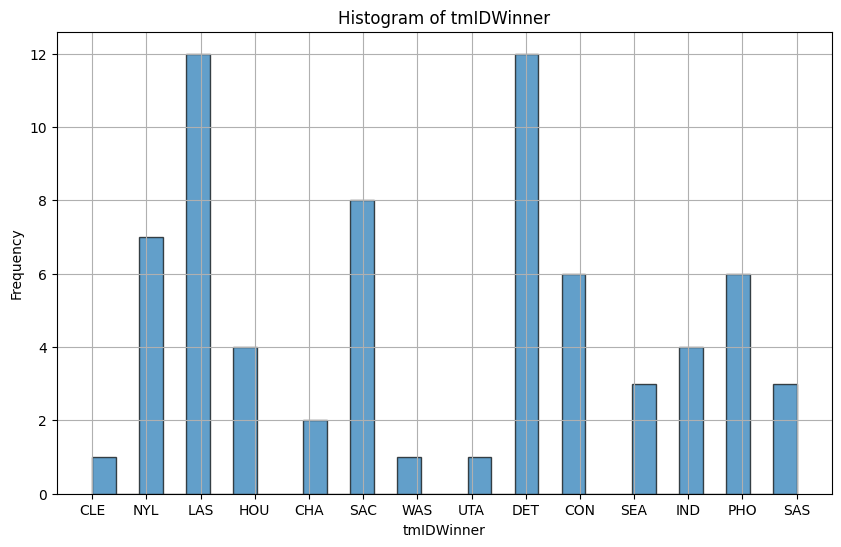

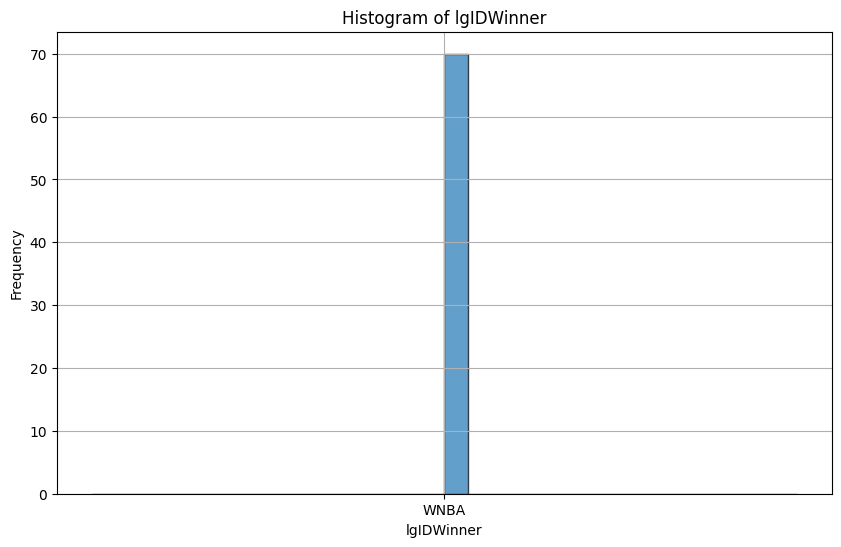

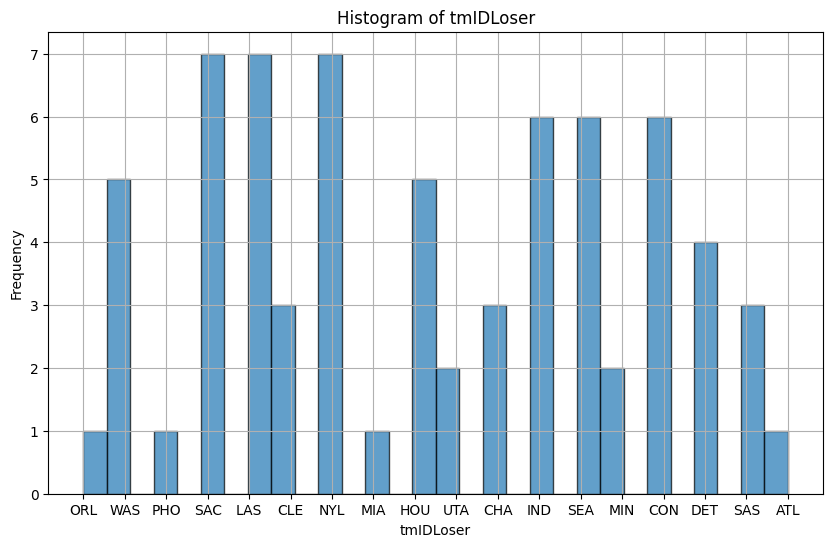

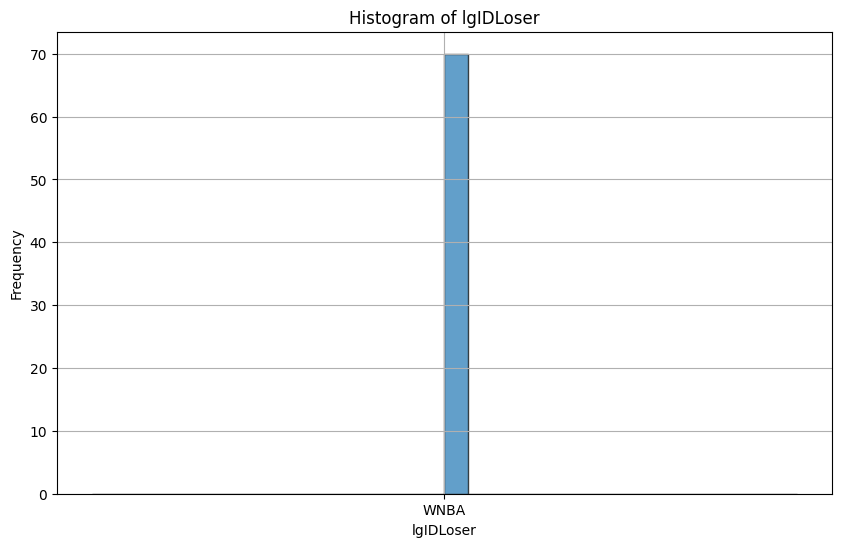

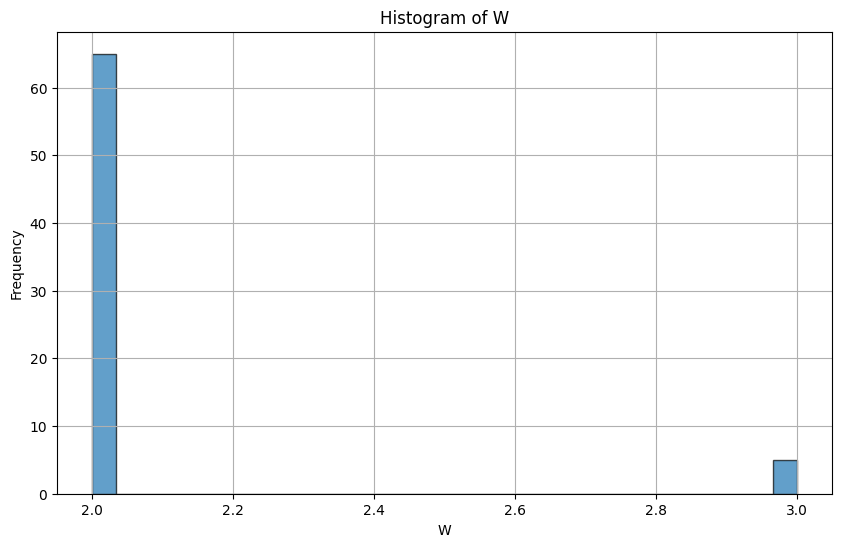

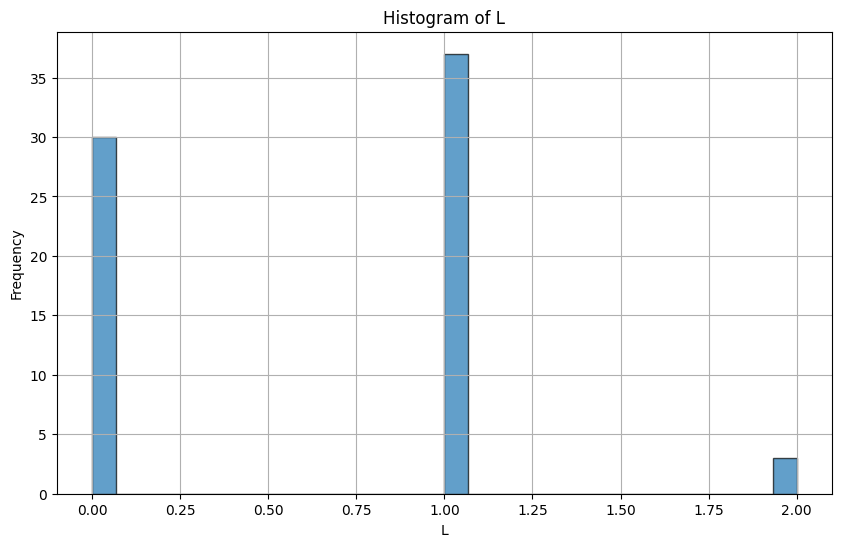

In [2]:
print(f"The distinct years are : {csv_seriesPost['year'].nunique()}")
print(f"The distinct rounds are : {csv_seriesPost['round'].nunique()}")
print(f"The distinct series are : {csv_seriesPost['series'].nunique()}")
print(f"The distinct tmIDWinner are : {csv_seriesPost['tmIDWinner'].nunique()}")
print(f"The distinct lgIDWinner are : {csv_seriesPost['lgIDWinner'].nunique()}")
print(f"The distinct tmIDLoser are : {csv_seriesPost['tmIDLoser'].nunique()}")
print(f"The distinct lgIDLoser are : {csv_seriesPost['lgIDLoser'].nunique()}")
print(f"The distinct W are : {csv_seriesPost['W'].nunique()}")
print(f"The distinct L are : {csv_seriesPost['L'].nunique()}")

# List of columns to create histograms for
columns = ['year', 'round', 'series', 'tmIDWinner', 'lgIDWinner', 'tmIDLoser', 'lgIDLoser', 'W', 'L']

# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_seriesPost[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Both lgIDWinner and lgIDLoser columns can be removed, since all the data is from WNBA and no teams from a different league can play in the WNBA.

In [3]:
# Check for missing values in each column of the csv_teams dataframe
missing_values = csv_seriesPost.isnull().sum()

# Display the missing values
for column, missing in missing_values.items():
    print(f"{column}: {missing}")

year: 0
round: 0
series: 0
tmIDWinner: 0
lgIDWinner: 0
tmIDLoser: 0
lgIDLoser: 0
W: 0
L: 0


There are no missing values on the series_post csv.

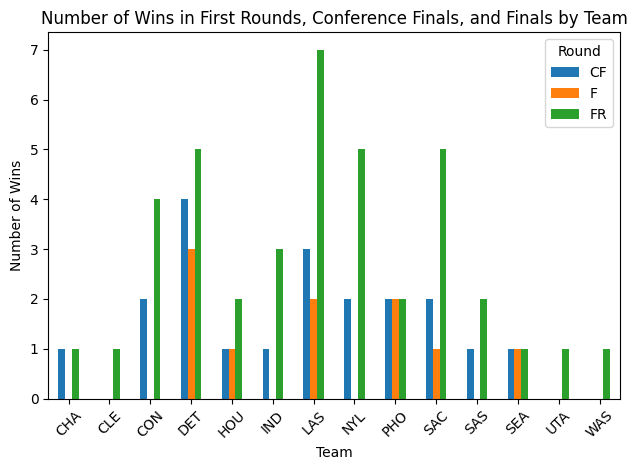

In [4]:
# Filter the data for each round
round_wins = csv_seriesPost.groupby(['tmIDWinner', 'round']).size().unstack(fill_value=0)

# Plot
round_wins.plot(kind='bar', stacked=False)
plt.title('Number of Wins in First Rounds, Conference Finals, and Finals by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Round', loc='upper right')
plt.tight_layout()
plt.show()

## Teams Table

**year** - from 1 to 10;

**lgID** - league ID (always WNBA);

**tmID** - team ID;

**franchID** - franchise ID;

**confID** - conference ID;

**divID** - division ID (?), always an empty string;

**rank** - rank on the regular season coming into the playoffs (first, second places...)

**playoff** - tells if a team went or not to the playoffs;

**seeded** - always 0;

**firstRound**, **semis** , **finals** - tells if a team won or not the first-round, semis or finals;

**name** - team's name;

**o_fgm**: Field goals made

**o_fga**: Field goals attempted

**o_ftm**: Free throws made

**o_fta**: Free throws attempted

**o_3pm**: Three-pointers made

**o_3pa**: Three-pointers attempted

**o_oreb**: Offensive rebounds

**o_dreb**: Defensive rebounds

**o_reb**: Total rebounds

**o_asts**: Assists

**o_pf**: Personal fouls

**o_stl**: Steals

**o_to**: Turnovers

**o_blk**: Blocks

**o_pts**: Points scored

**d_fgm**: Field goals made by opponents

**d_fga**: Field goals attempted by opponents

**d_ftm**: Free throws made by opponents

**d_fta**: Free throws attempted by opponents

**d_3pm**: Three-pointers made by opponents

**d_3pa**: Three-pointers attempted by opponents

**d_oreb**: Offensive rebounds by opponents

**d_dreb**: Defensive rebounds by opponents

**d_reb**: Total rebounds by opponents

**d_asts**: Assists by opponents

**d_pf**: Personal fouls by opponents

**d_stl**: Steals by opponents

**d_to**: Turnovers by opponents

**d_blk**: Blocks by opponents

**d_pts**: Points scored by opponents

**tmORB**: Team offensive rebounds

**tmDRB**: Team defensive rebounds

**tmTRB**: Team total rebounds

**opptmORB**: Opponent team offensive rebounds

**opptmDRB**: Opponent team defensive rebounds

**opptmTRB**: Opponent team total rebounds

**won**: Games won in the season

**lost**: Games lost in the season

**GP**: Games played

**homeW**: Home games won

**homeL**: Home games lost

**awayW**: Away games won

**awayL**: Away games lost

**confW**: Conference games won

**confL**: Conference games lost

**min** - total minutes played by a team in a season (?);

**attend** - number of spectators at the team's games over a season;

**arena** - name of the team's arena;













The distinct year are : 10
The distinct lgID are : 1
The distinct tmID are : 20
The distinct franchID are : 18
The distinct confID are : 2
The distinct rank are : 8
The distinct divID are : 0
The distinct seeded are : 1
The distinct playoff are : 2
The distinct arena are : 22
Number of appearances of the values in the seeded column:
seeded
0    142
Name: count, dtype: int64


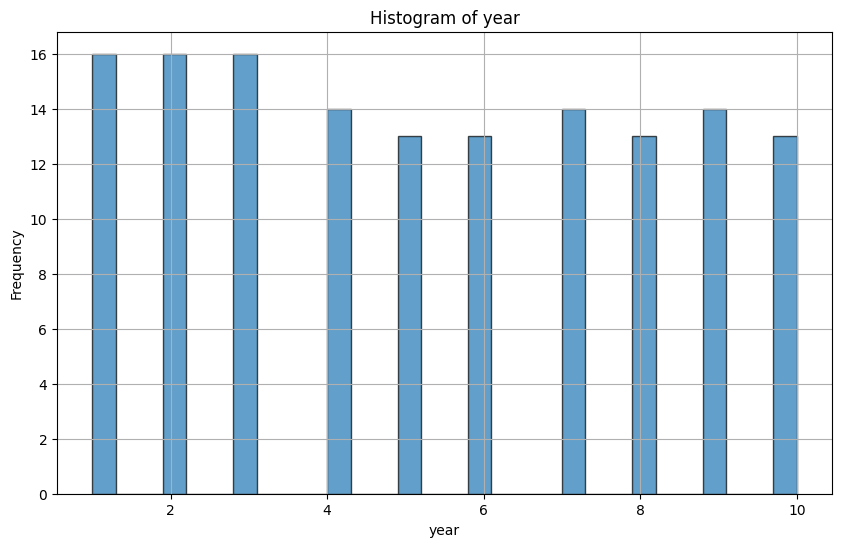

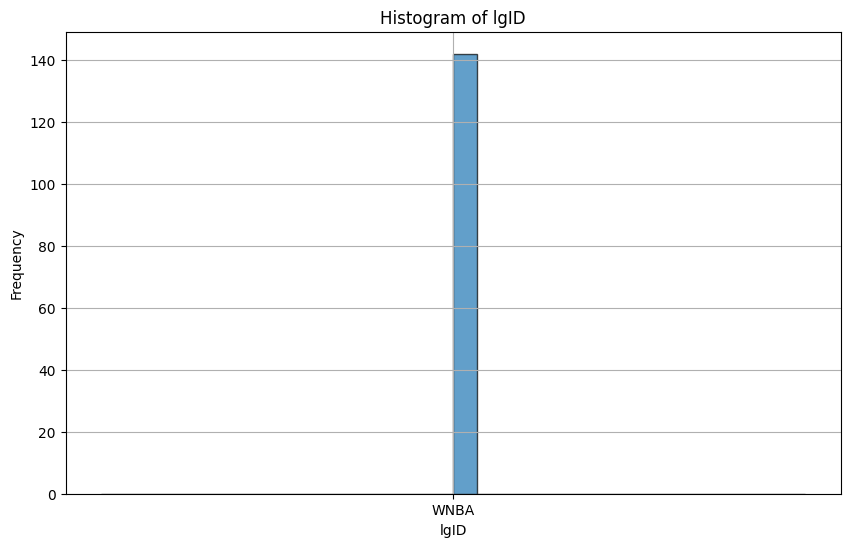

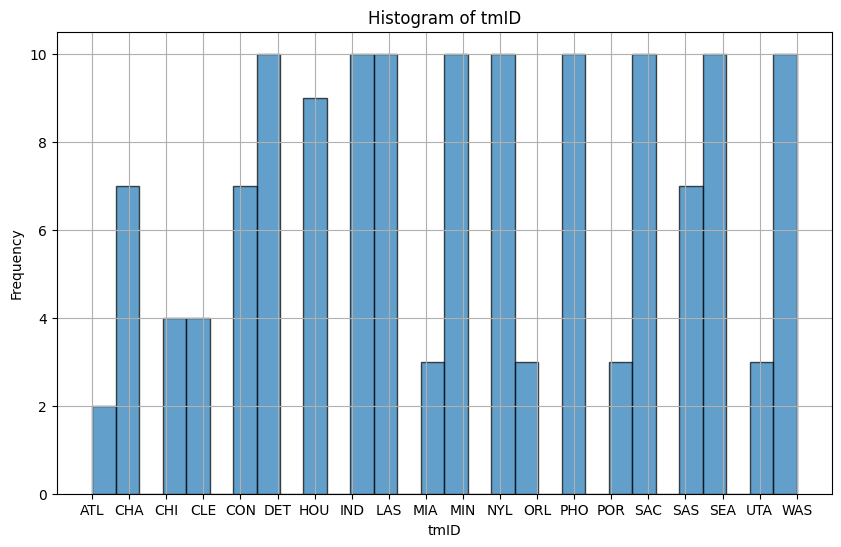

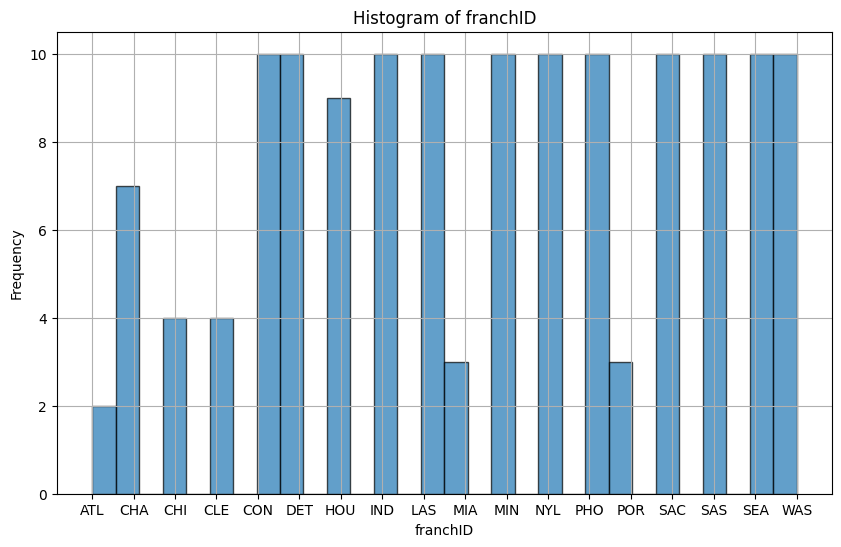

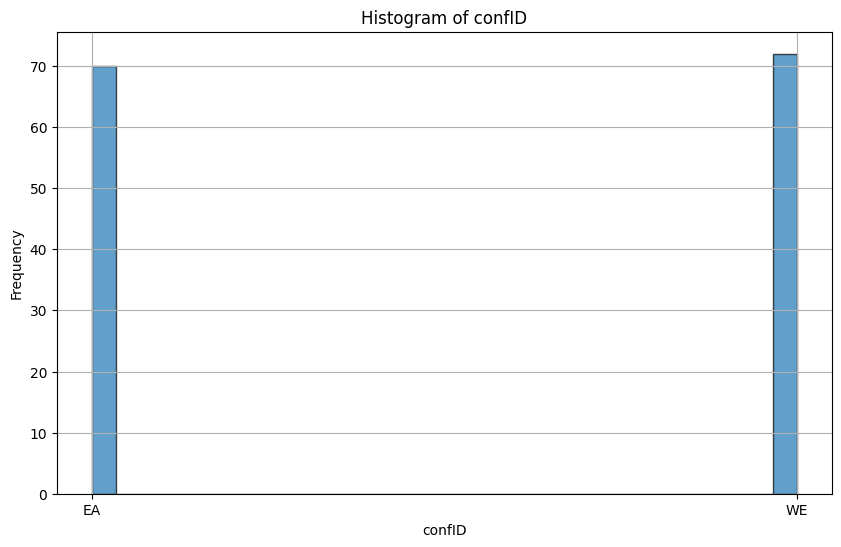

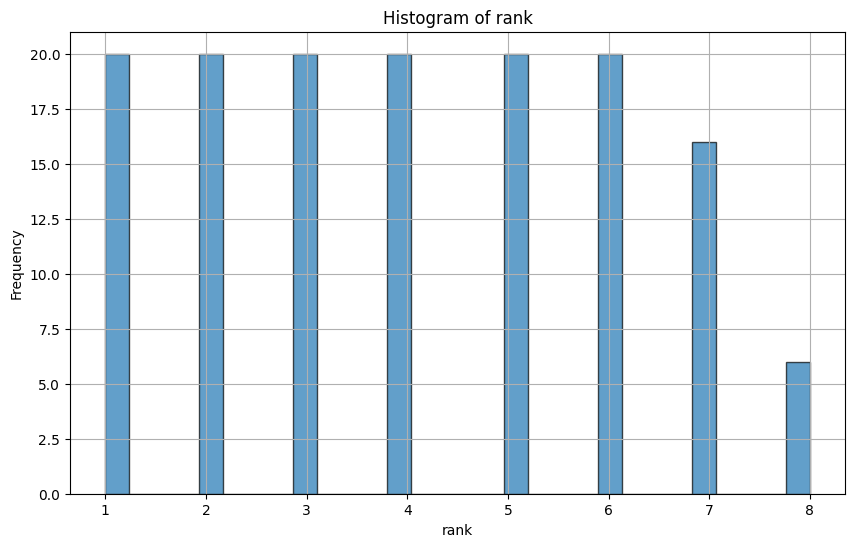

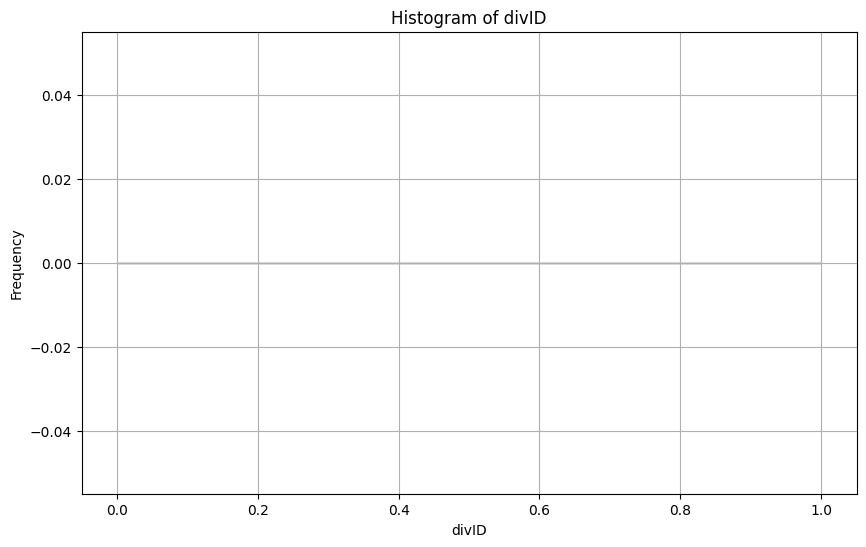

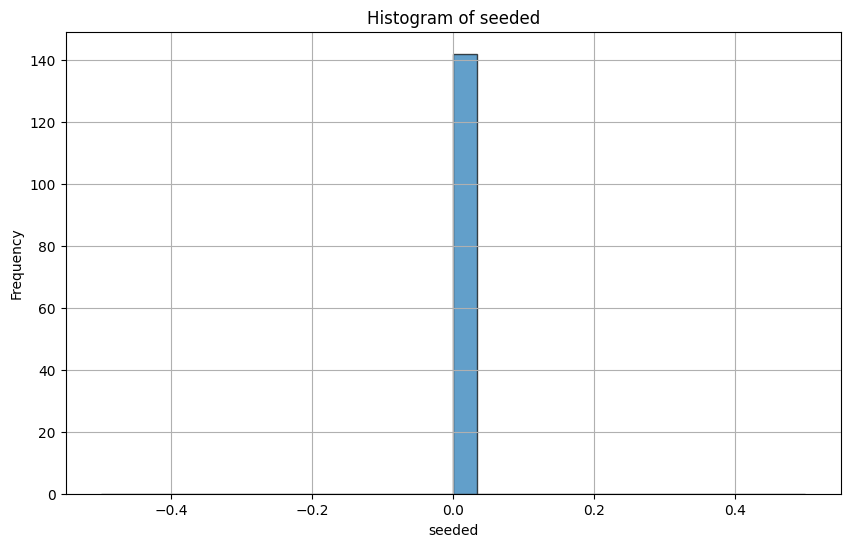

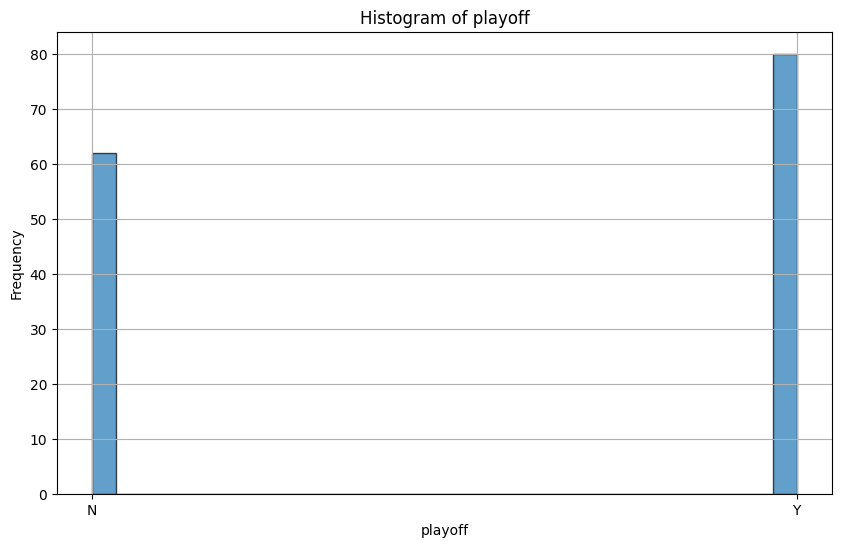

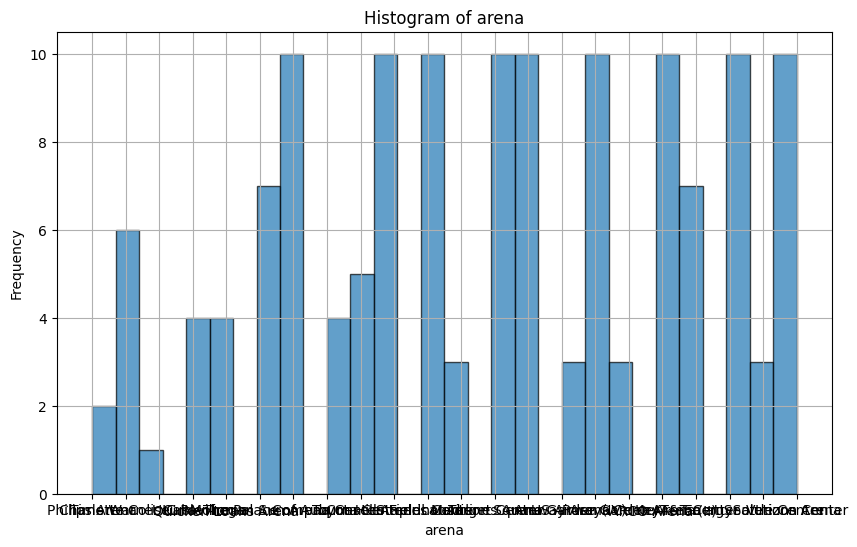

In [5]:
print(f"The distinct year are : {csv_teams['year'].nunique()}")
print(f"The distinct lgID are : {csv_teams['lgID'].nunique()}")
print(f"The distinct tmID are : {csv_teams['tmID'].nunique()}")
print(f"The distinct franchID are : {csv_teams['franchID'].nunique()}")
print(f"The distinct confID are : {csv_teams['confID'].nunique()}")
print(f"The distinct rank are : {csv_teams['rank'].nunique()}")
print(f"The distinct divID are : {csv_teams['divID'].nunique()}")
print(f"The distinct seeded are : {csv_teams['seeded'].nunique()}")
print(f"The distinct playoff are : {csv_teams['playoff'].nunique()}")
print(f"The distinct arena are : {csv_teams['arena'].nunique()}")


# Count the number of appearances of the values in the seeded column
seeded_counts = csv_teams['seeded'].value_counts()
print(f"Number of appearances of the values in the seeded column:\n{seeded_counts}")


# List of columns to create histograms for
columns = ['year', 'lgID', 'tmID', 'franchID', 'confID', 'rank', 'divID', 'seeded', 'playoff', 'arena']

# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_teams[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Since the lgID, seeded and divID columns always have the same values (WNBA, 0, "", respectively) these columns can be droped because it won't affect the training of the model.

/tmp/ipykernel_15097/2773648310.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoff_csv_teams['firstRound'] = playoff_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)
/tmp/ipykernel_15097/2773648310.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playoff_csv_teams['semis'] = playoff_csv_teams['semis'].apply(lambda x: 1 if x == 'W' else 0)
/tmp/ipykernel_15097/2773648310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

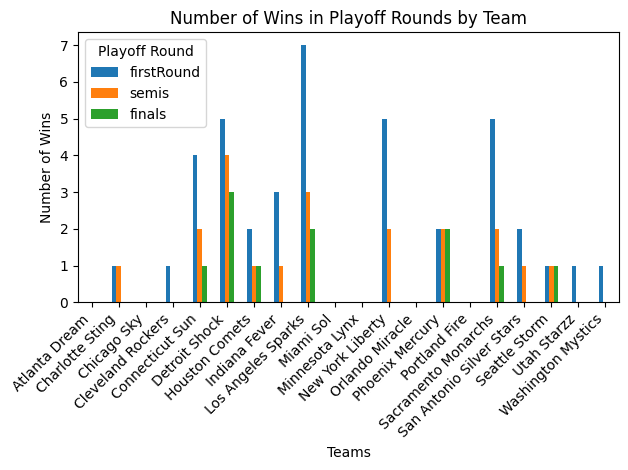

In [6]:
# Filter the relevant columns: 'name', 'firstRound', 'semis', 'finals'
playoff_columns = ['name', 'firstRound', 'semis', 'finals']
playoff_csv_teams = csv_teams[playoff_columns]

# Clean up data - replace any missing or non-win values with 0 and convert to integer
playoff_csv_teams['firstRound'] = playoff_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)
playoff_csv_teams['semis'] = playoff_csv_teams['semis'].apply(lambda x: 1 if x == 'W' else 0)
playoff_csv_teams['finals'] = playoff_csv_teams['finals'].apply(lambda x: 1 if x == 'W' else 0)

# Group by team name and sum the number of wins in each playoff round
grouped_playoff_csv_teams = playoff_csv_teams.groupby('name').sum()

# Plot the chart
grouped_playoff_csv_teams.plot(kind='bar', stacked=False)
plt.title("Number of Wins in Playoff Rounds by Team")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Playoff Round")
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_15097/2624436333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offensive_csv_teams['firstRound'] = offensive_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)


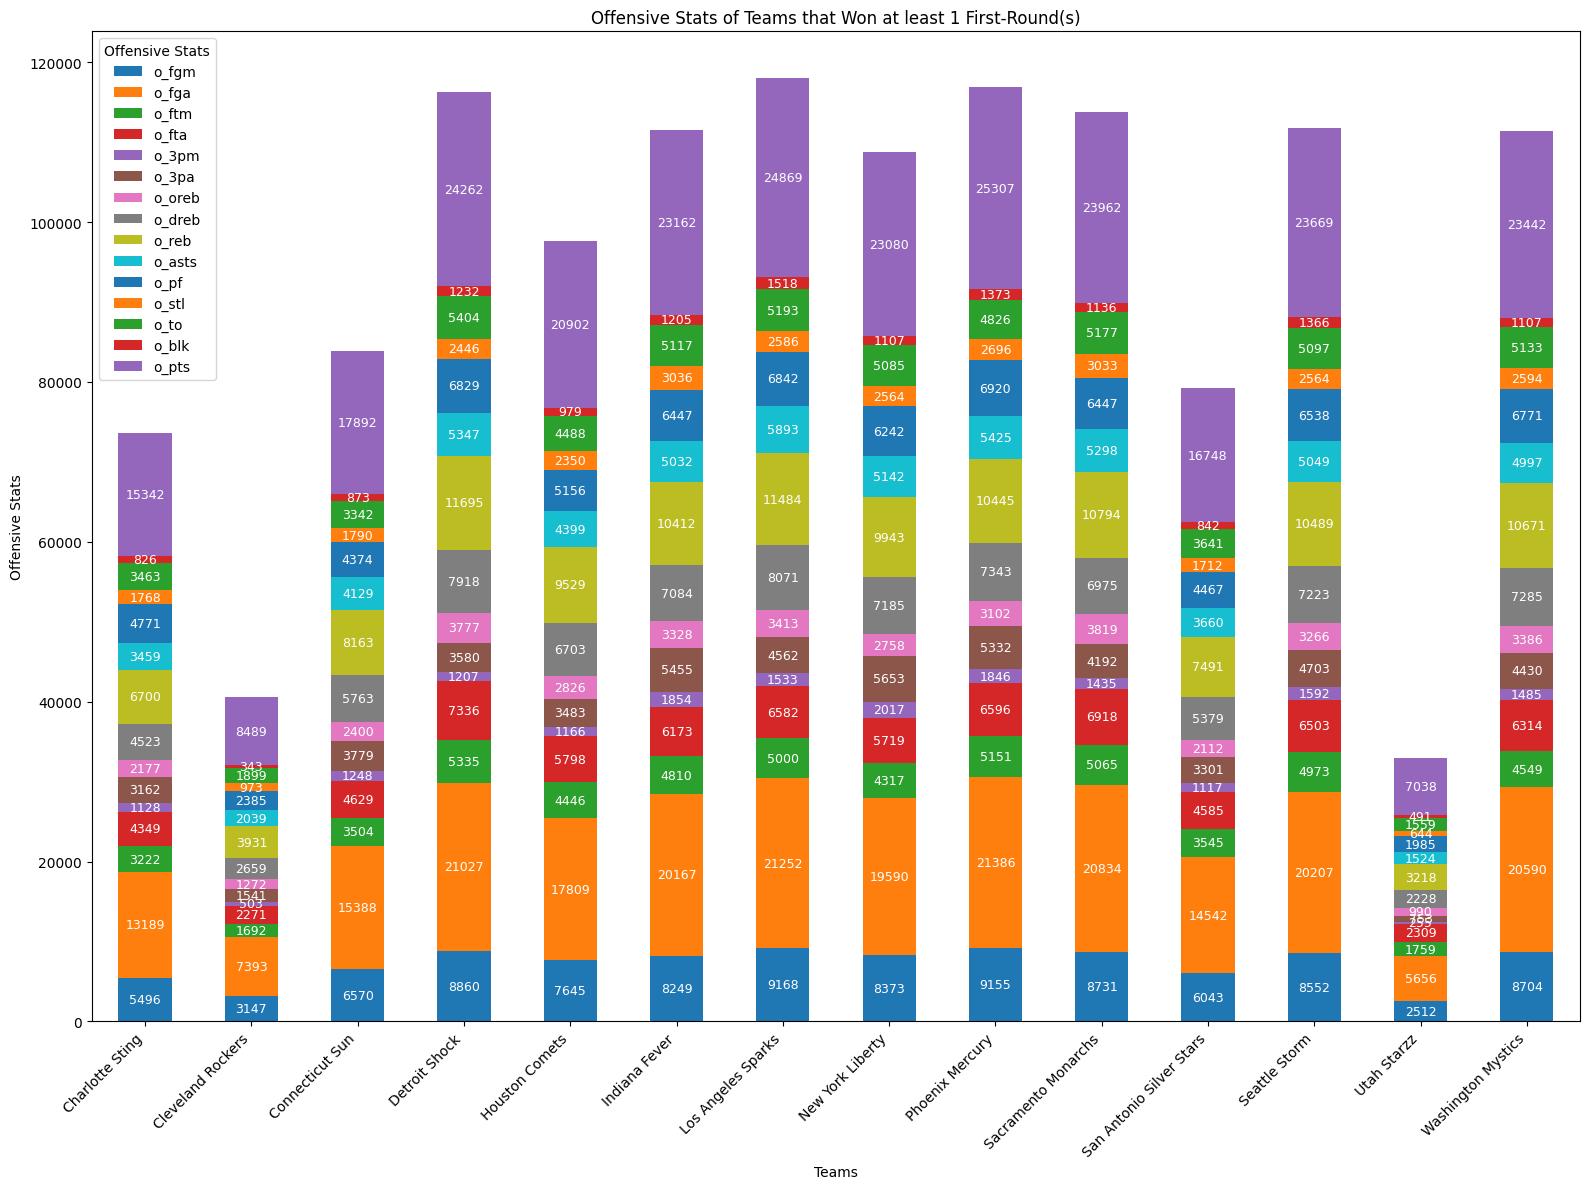

In [7]:
# Filter the relevant columns: offensive stats and first-round outcome
defensive_columns = [col for col in csv_teams.columns if col.startswith("o_")]
filtered_columns = ['name', 'firstRound'] + defensive_columns
offensive_csv_teams = csv_teams[filtered_columns]

# Convert the 'firstRound' column to a binary indicator of wins
offensive_csv_teams['firstRound'] = offensive_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)

# Group by team and sum the number of first-round wins
grouped_offensive_csv_teams = offensive_csv_teams.groupby('name').sum()

# Filter teams that have won x number of first rounds (change 'x' to the number of wins you want to filter by)
x = 1  # For example, teams that won 1 first-round
teams_with_x_wins = grouped_offensive_csv_teams[grouped_offensive_csv_teams['firstRound'] >= x]

# Create the plot with increased figure size
ax = teams_with_x_wins[defensive_columns].plot(kind='bar', stacked=True, figsize=(16, 12))
plt.title(f"Offensive Stats of Teams that Won at least {x} First-Round(s)")
plt.xlabel("Teams")
plt.ylabel("Offensive Stats")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Offensive Stats")
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='white')

# Show the plot
plt.show()

/tmp/ipykernel_15097/4171714629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defensive_csv_teams['firstRound'] = defensive_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)


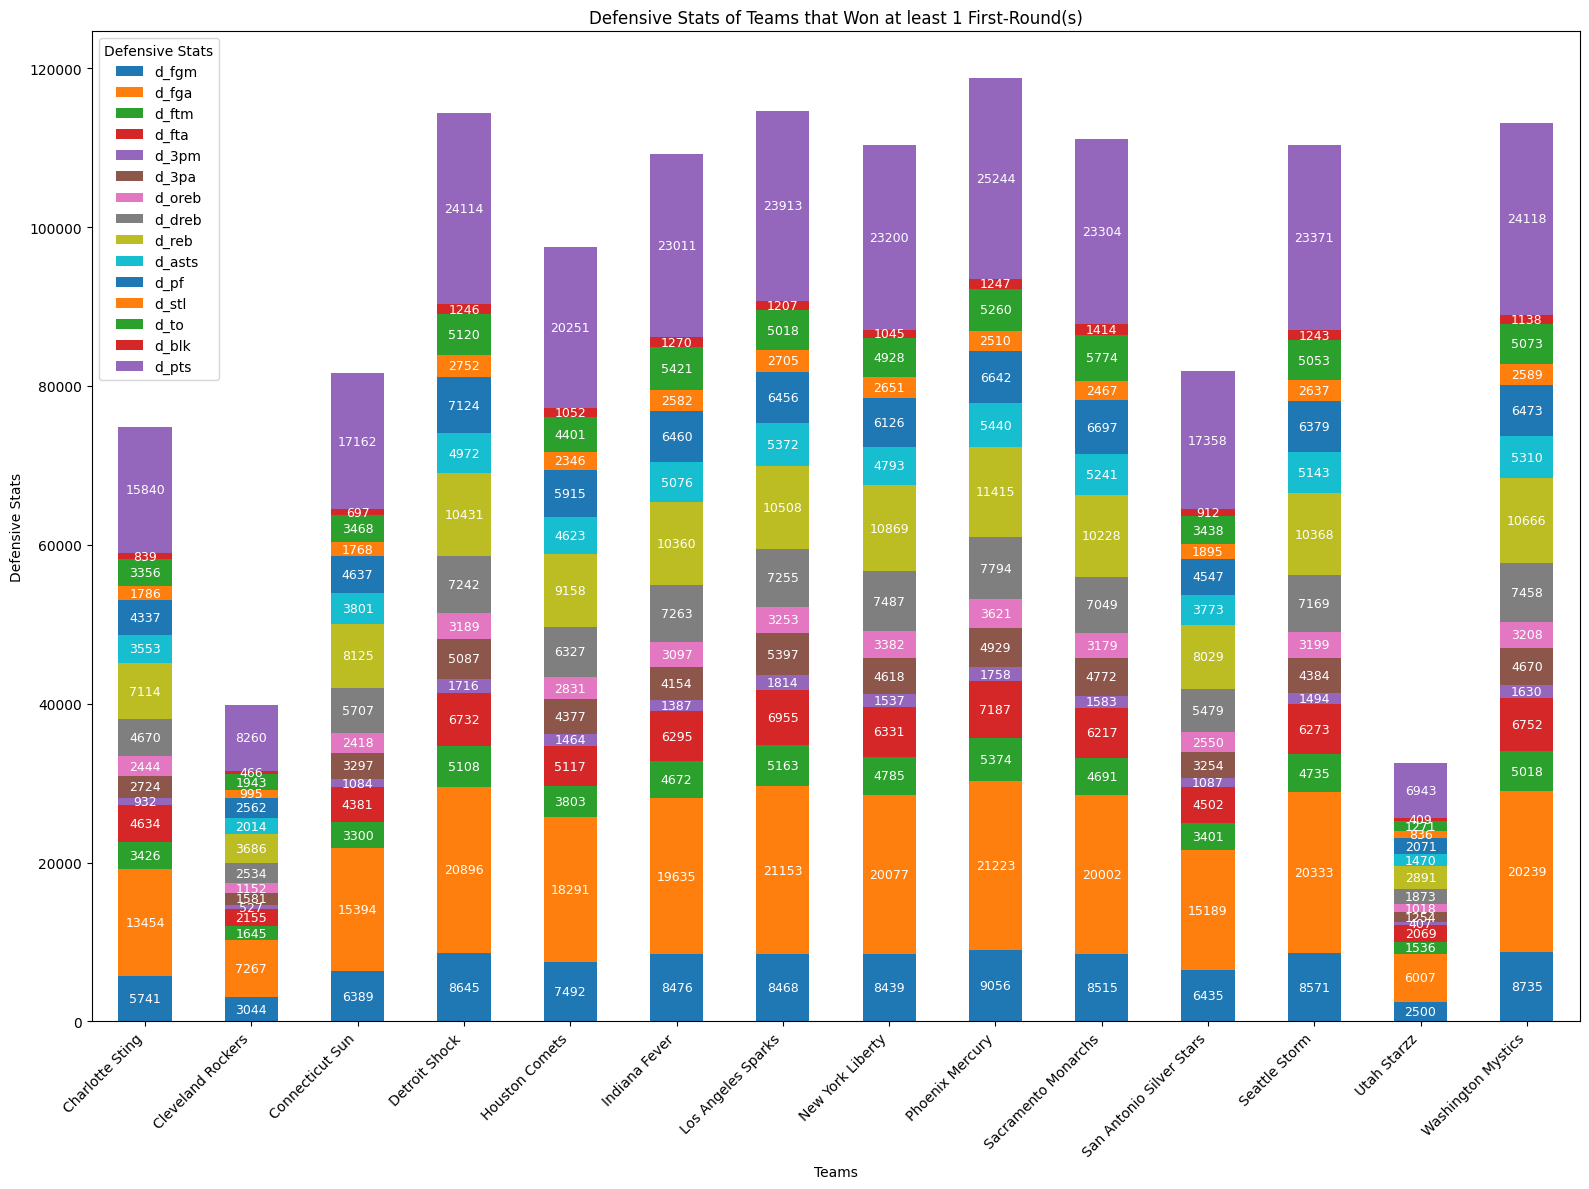

In [8]:
# Filter the relevant columns: offensive stats and first-round outcome
defensive_columns = [col for col in csv_teams.columns if col.startswith("d_")]
filtered_columns = ['name', 'firstRound'] + defensive_columns
defensive_csv_teams = csv_teams[filtered_columns]

# Convert the 'firstRound' column to a binary indicator of wins
defensive_csv_teams['firstRound'] = defensive_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)

# Group by team and sum the number of first-round wins
grouped_defensive_csv_teams = defensive_csv_teams.groupby('name').sum()

# Filter teams that have won x number of first rounds (change 'x' to the number of wins you want to filter by)
x = 1  # For example, teams that won 1 first-round
teams_with_x_wins = grouped_defensive_csv_teams[grouped_defensive_csv_teams['firstRound'] >= x]

# Create the plot with increased figure size
ax = teams_with_x_wins[defensive_columns].plot(kind='bar', stacked=True, figsize=(16, 12))
plt.title(f"Defensive Stats of Teams that Won at least {x} First-Round(s)")
plt.xlabel("Teams")
plt.ylabel("Defensive Stats")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Defensive Stats")
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='white')

# Show the plot
plt.show()

/tmp/ipykernel_15097/3014965088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_df['firstRound'] = conf_df['firstRound'].apply(lambda x: 1 if x == 'W' else 0)


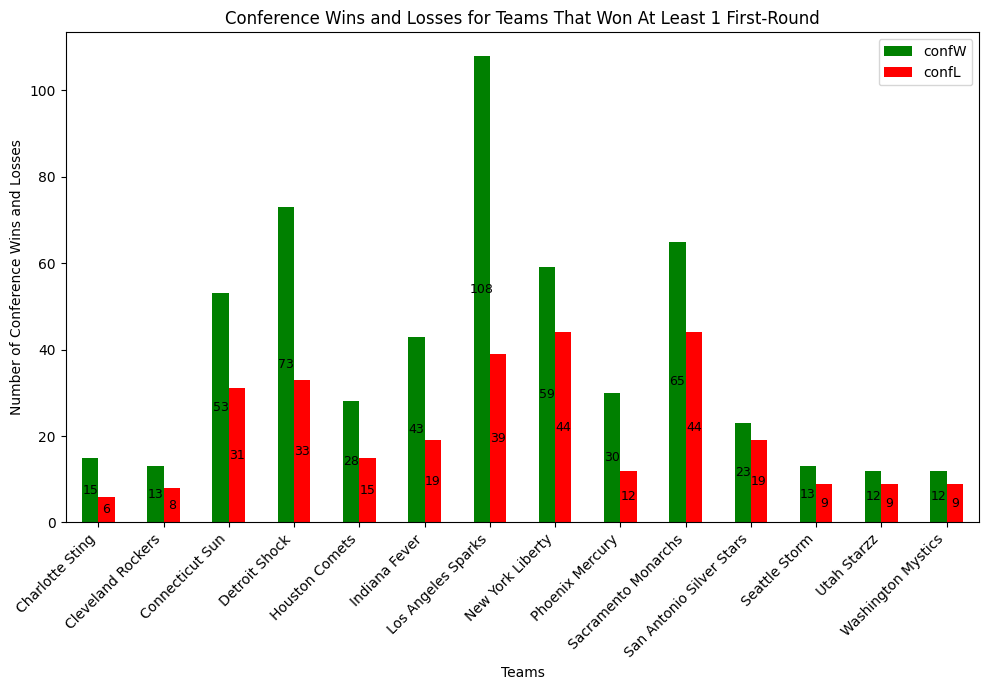

In [9]:
# Filter the relevant columns: first round, conference wins (confW), and conference losses (confL)
filtered_columns = ['name', 'firstRound', 'confW', 'confL']
conf_df = csv_teams[filtered_columns]

# Convert 'firstRound' column to a binary indicator of wins
conf_df['firstRound'] = conf_df['firstRound'].apply(lambda x: 1 if x == 'W' else 0)

# Filter teams that have won at least one first round
teams_with_first_round_win = conf_df[conf_df['firstRound'] >= 1]

# Group by team and sum the conference wins and losses
grouped_conf_df = teams_with_first_round_win.groupby('name').sum()

# Create the plot for conference wins and losses
ax = grouped_conf_df[['confW', 'confL']].plot(kind='bar', stacked=False, figsize=(10, 7), color=['green', 'red'])

# Add title and labels
plt.title("Conference Wins and Losses for Teams That Won At Least 1 First-Round")
plt.xlabel("Teams")
plt.ylabel("Number of Conference Wins and Losses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='black')

# Show the plot
plt.show()

/tmp/ipykernel_15097/4163281405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_df['semis'] = conf_df['semis'].apply(lambda x: 1 if x == 'W' else 0)


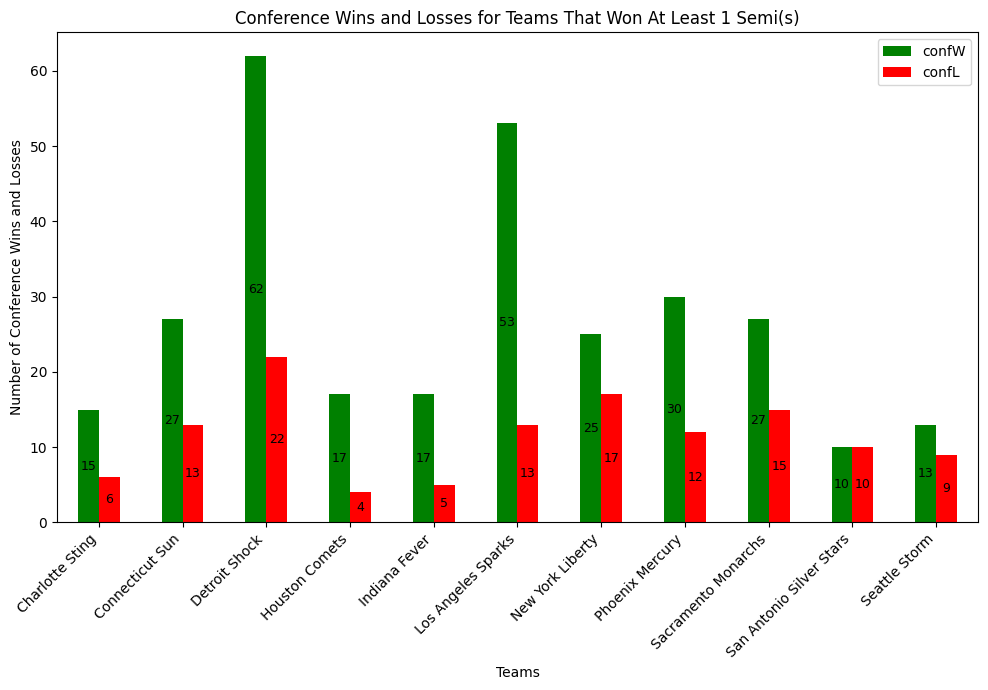

In [10]:
# Filter the relevant columns: first round, conference wins (confW), and conference losses (confL)
filtered_columns = ['name', 'semis', 'confW', 'confL']
conf_df = csv_teams[filtered_columns]

# Convert 'firstRound' column to a binary indicator of wins
conf_df['semis'] = conf_df['semis'].apply(lambda x: 1 if x == 'W' else 0)

# Filter teams that have won at least one first round
teams_with_first_round_win = conf_df[conf_df['semis'] >= 1]

# Group by team and sum the conference wins and losses
grouped_conf_df = teams_with_first_round_win.groupby('name').sum()

# Create the plot for conference wins and losses
ax = grouped_conf_df[['confW', 'confL']].plot(kind='bar', stacked=False, figsize=(10, 7), color=['green', 'red'])

# Add title and labels
plt.title("Conference Wins and Losses for Teams That Won At Least 1 Semi(s)")
plt.xlabel("Teams")
plt.ylabel("Number of Conference Wins and Losses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='black')

# Show the plot
plt.show()

/tmp/ipykernel_15097/40926667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_df['finals'] = conf_df['finals'].apply(lambda x: 1 if x == 'W' else 0)


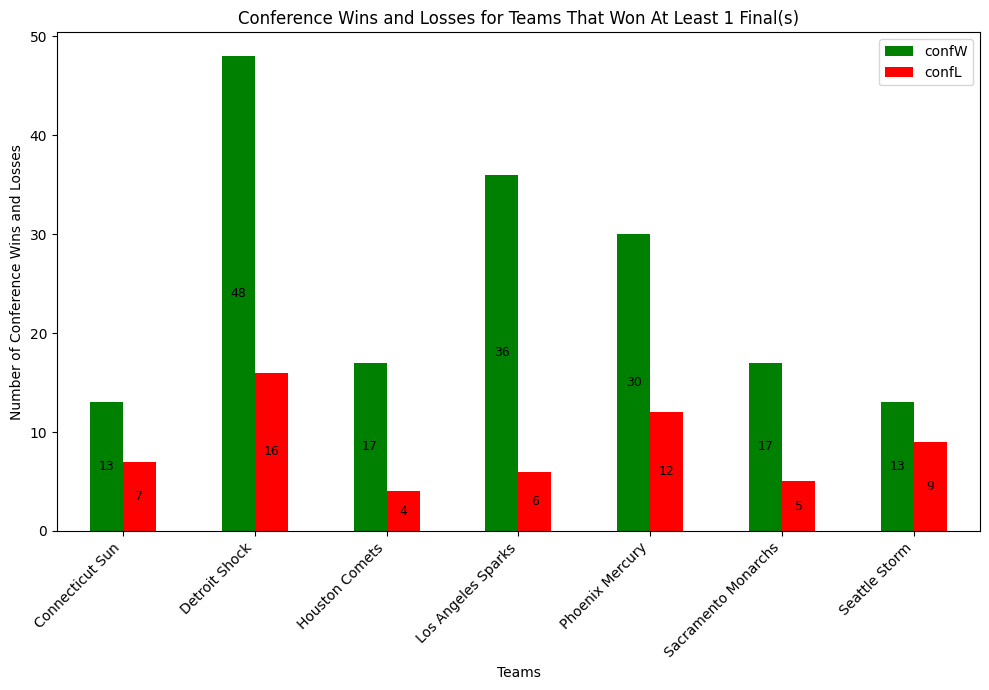

In [11]:
# Filter the relevant columns: first round, conference wins (confW), and conference losses (confL)
filtered_columns = ['name', 'finals', 'confW', 'confL']
conf_df = csv_teams[filtered_columns]

# Convert 'firstRound' column to a binary indicator of wins
conf_df['finals'] = conf_df['finals'].apply(lambda x: 1 if x == 'W' else 0)

# Filter teams that have won at least one first round
teams_with_first_round_win = conf_df[conf_df['finals'] >= 1]

# Group by team and sum the conference wins and losses
grouped_conf_df = teams_with_first_round_win.groupby('name').sum()

# Create the plot for conference wins and losses
ax = grouped_conf_df[['confW', 'confL']].plot(kind='bar', stacked=False, figsize=(10, 7), color=['green', 'red'])

# Add title and labels
plt.title("Conference Wins and Losses for Teams That Won At Least 1 Final(s)")
plt.xlabel("Teams")
plt.ylabel("Number of Conference Wins and Losses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='black')

# Show the plot
plt.show()

# Players Table

The distinct players are : 893
The distinct positions are : 7
The distinct firstSeason are : 1
The distinct lastSeason are : 1
The distinct height are : 21
The distinct weight are : 105
The distinct college are : 160
The distinct collegeOther are : 11
The distinct birthDate are : 764
The distinct deathDate are : 5


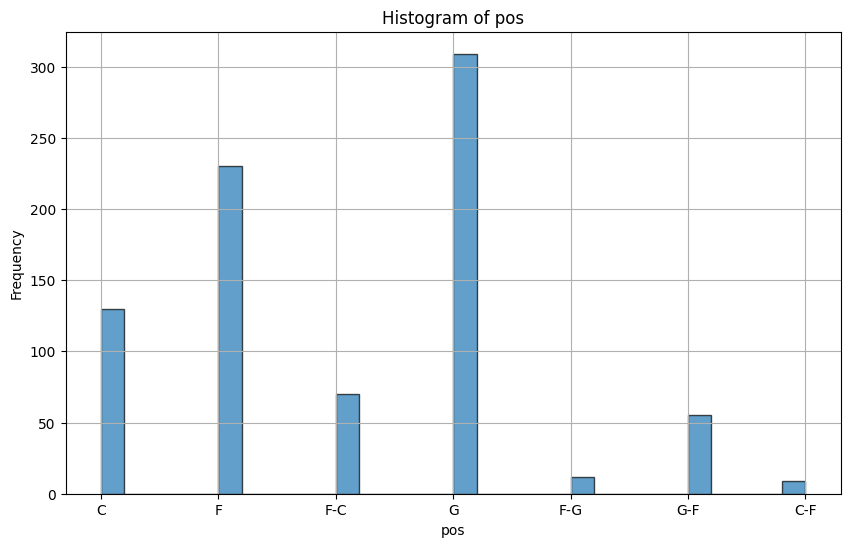

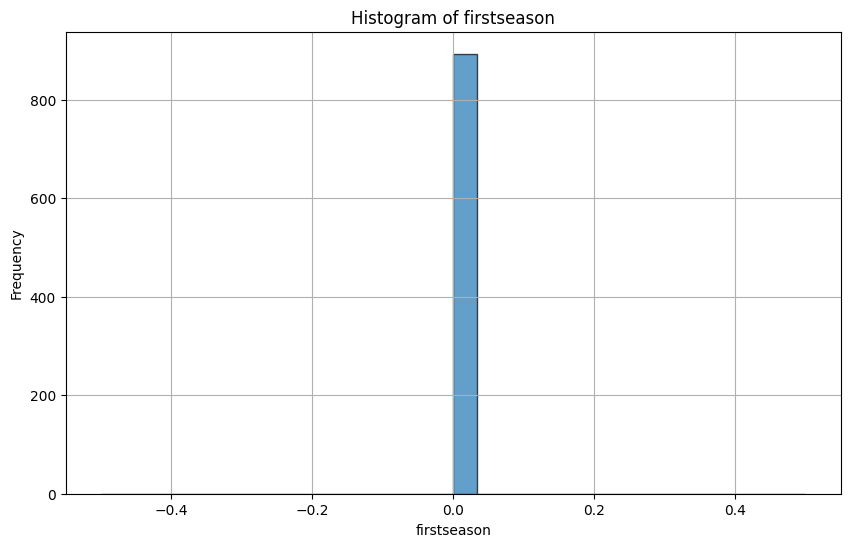

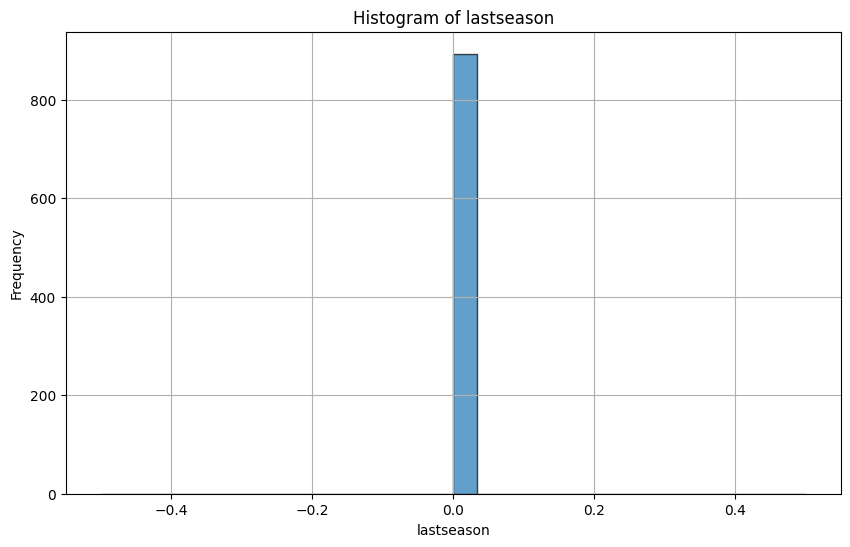

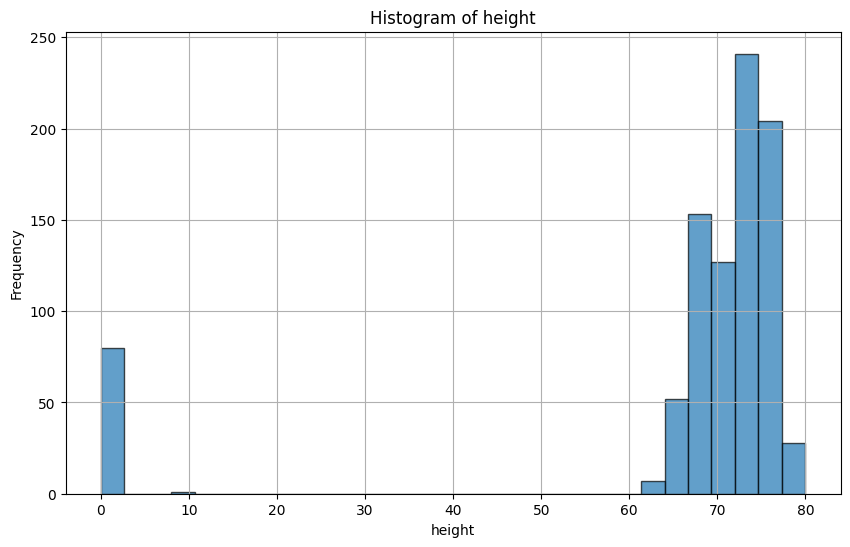

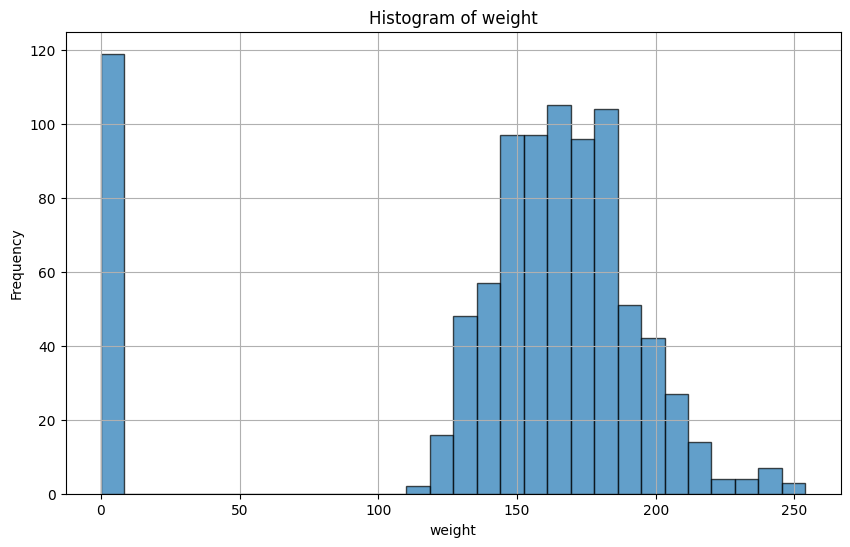

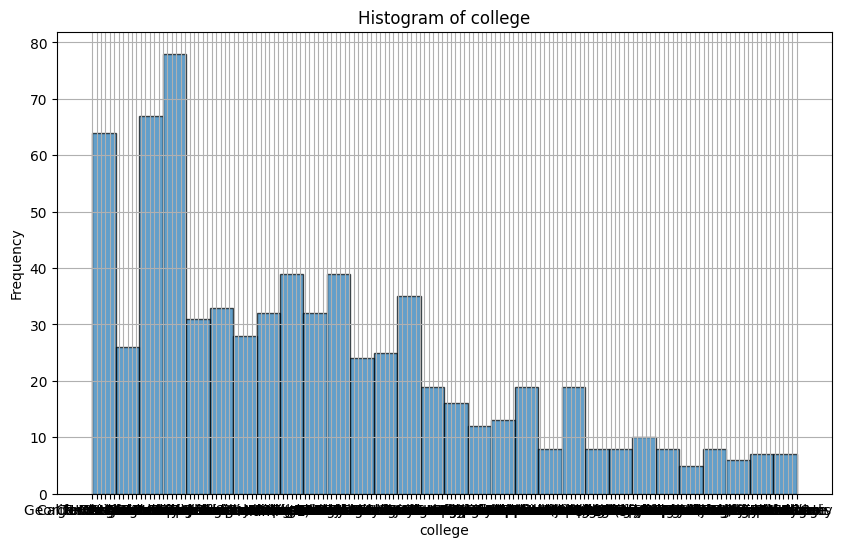

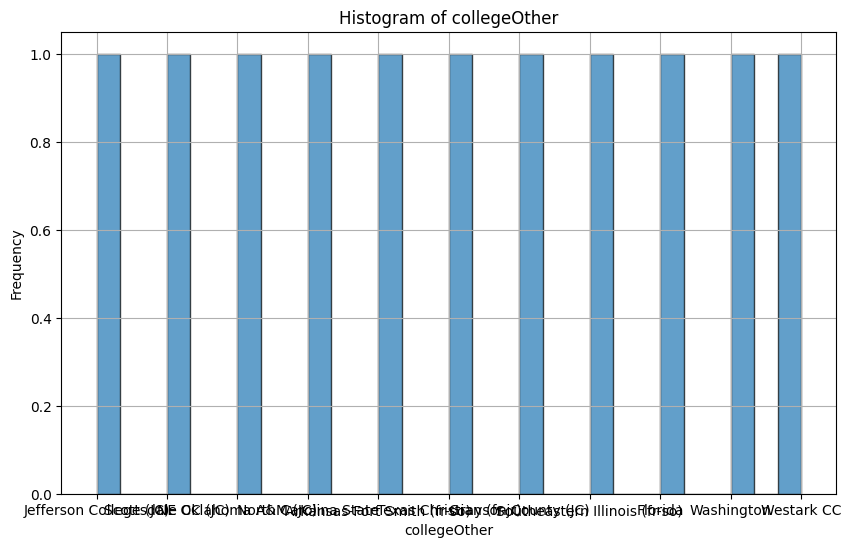

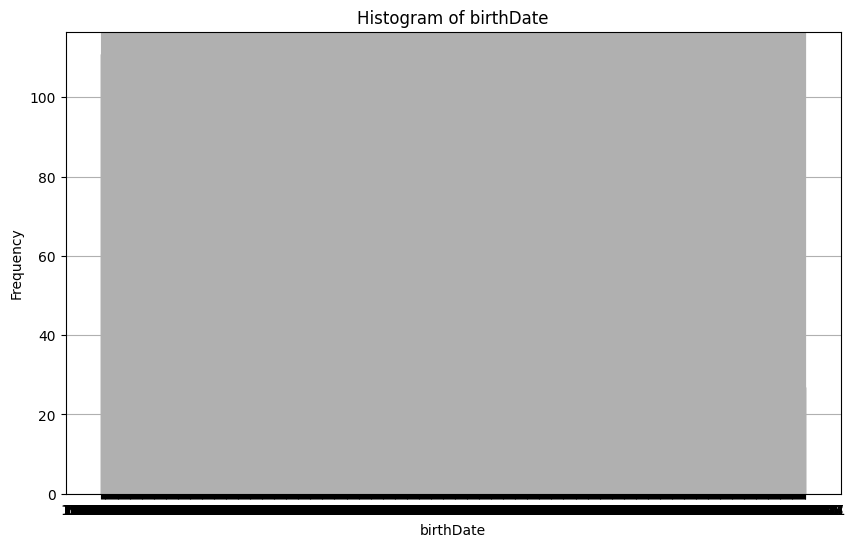

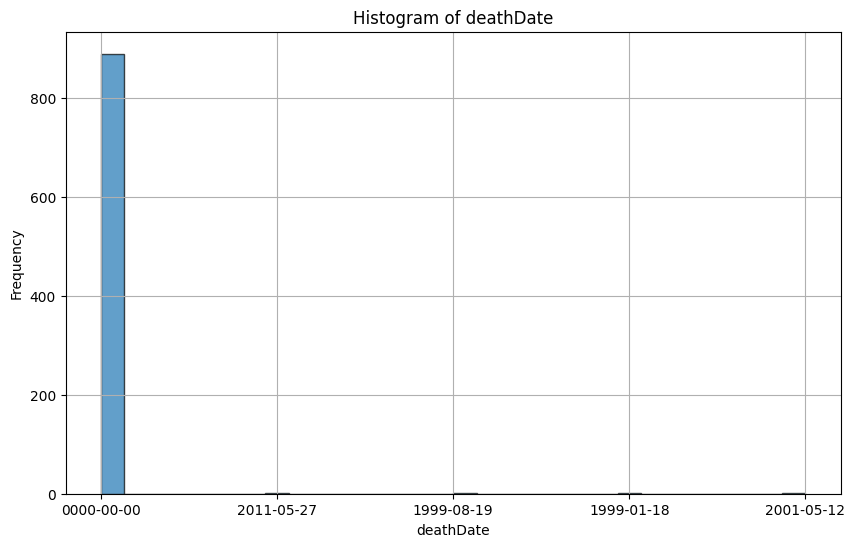

In [12]:
# check the distinct values of the columns


print(f"The distinct players are : {csv_players['bioID'].nunique()}")
print(f"The distinct positions are : {csv_players['pos'].nunique()}")
print(f"The distinct firstSeason are : {csv_players['firstseason'].nunique()}")
print(f"The distinct lastSeason are : {csv_players['lastseason'].nunique()}")
print(f"The distinct height are : {csv_players['height'].nunique()}")
print(f"The distinct weight are : {csv_players['weight'].nunique()}")
print(f"The distinct college are : {csv_players['college'].nunique()}")
print(f"The distinct collegeOther are : {csv_players['collegeOther'].nunique()}")
print(f"The distinct birthDate are : {csv_players['birthDate'].nunique()}")
print(f"The distinct deathDate are : {csv_players['deathDate'].nunique()}")

# List of columns to create histograms for
columns = ['pos', 'firstseason', 'lastseason', 'height', 'weight', 'college', 'collegeOther', 'birthDate', 'deathDate']

# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_players[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Having in mind the above experiments we reach out that the columns first season, last season, birth date are useless for the objective of the project so we might drop them. 


# Players Teams

The distinct playerID are : 555
The distinct years are : 10
The distinct stint are : 4
The distinct teamID are : 20
The distinct lgID are : 1
The distinct GP are : 34
The distinct GS are : 35
The distinct minutes are : 899
The distinct points are : 530
The distinct oRebounds are : 111
The distinct dRebounds are : 203
The distinct rebounds are : 270
The distinct assists are : 174
The distinct steals are : 87
The distinct blocks are : 77
The distinct turnovers are : 118
The distinct PF are : 137
The distinct fgAttempted are : 456
The distinct fgMade are : 225
The distinct ftAttempted are : 200
The distinct ftMade are : 165
The distinct threeAttempted are : 187
The distinct threeMade are : 82
The distinct DQ are : 8
The distinct PostGP are : 12
The distinct PostGS are : 12
The distinct PostMinutes are : 254
The distinct PostPoints are : 138
The distinct PostoRebounds are : 29
The distinct PostdRebounds are : 53
The distinct PostRebounds are : 74
The distinct PostAssists are : 49
The disti

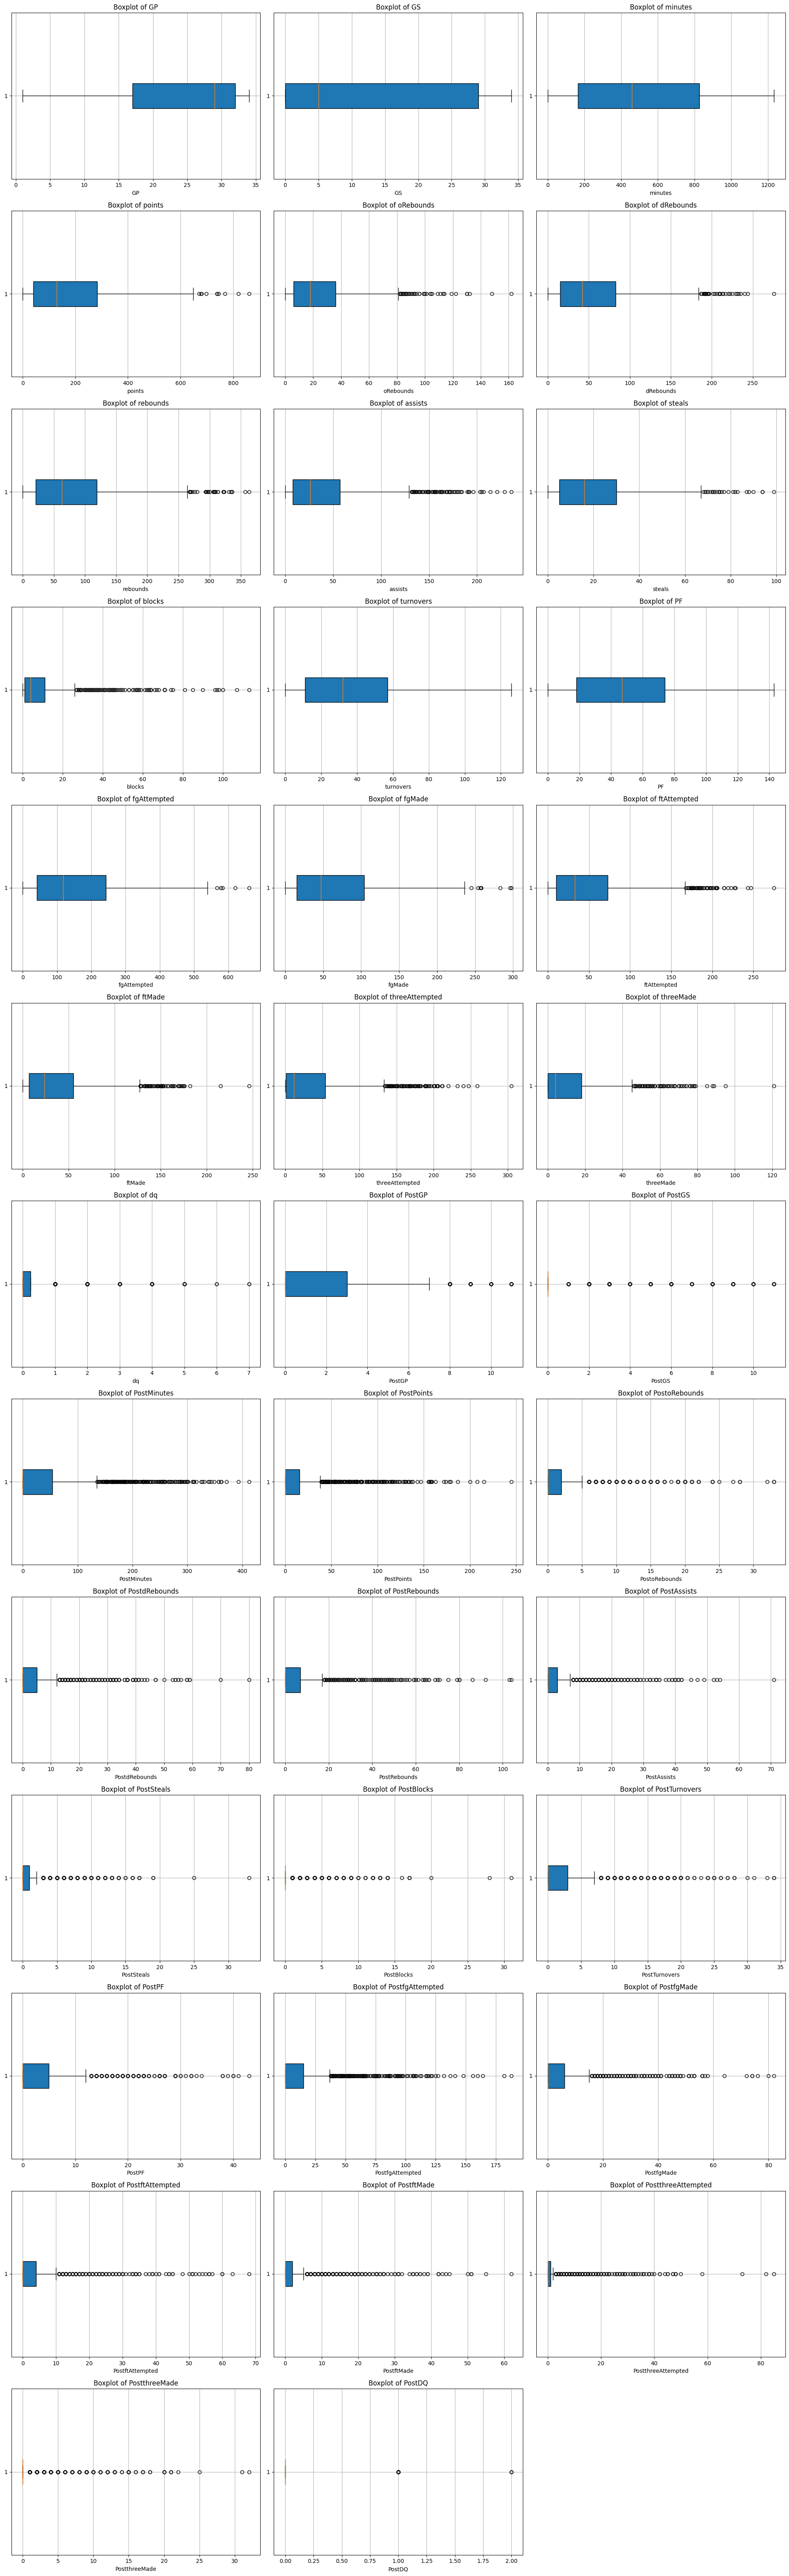

In [13]:
# check the distinct values for the players_teams table 

print(f"The distinct playerID are : {csv_playersTeams['playerID'].nunique()}")
print(f"The distinct years are : {csv_playersTeams['year'].nunique()}") 
print(f"The distinct stint are : {csv_playersTeams['stint'].nunique()}")
print(f"The distinct teamID are : {csv_playersTeams['tmID'].nunique()}")
print(f"The distinct lgID are : {csv_playersTeams['lgID'].nunique()}")
print(f"The distinct GP are : {csv_playersTeams['GP'].nunique()}")
print(f"The distinct GS are : {csv_playersTeams['GS'].nunique()}")
print(f"The distinct minutes are : {csv_playersTeams['minutes'].nunique()}")
print(f"The distinct points are : {csv_playersTeams['points'].nunique()}")
print(f"The distinct oRebounds are : {csv_playersTeams['oRebounds'].nunique()}")

print(f"The distinct dRebounds are : {csv_playersTeams['dRebounds'].nunique()}")
print(f"The distinct rebounds are : {csv_playersTeams['rebounds'].nunique()}")
print(f"The distinct assists are : {csv_playersTeams['assists'].nunique()}")
print(f"The distinct steals are : {csv_playersTeams['steals'].nunique()}")
print(f"The distinct blocks are : {csv_playersTeams['blocks'].nunique()}")
print(f"The distinct turnovers are : {csv_playersTeams['turnovers'].nunique()}")
print(f"The distinct PF are : {csv_playersTeams['PF'].nunique()}")
print(f"The distinct fgAttempted are : {csv_playersTeams['fgAttempted'].nunique()}")
print(f"The distinct fgMade are : {csv_playersTeams['fgMade'].nunique()}")
print(f"The distinct ftAttempted are : {csv_playersTeams['ftAttempted'].nunique()}")

print(f"The distinct ftMade are : {csv_playersTeams['ftMade'].nunique()}")
print(f"The distinct threeAttempted are : {csv_playersTeams['threeAttempted'].nunique()}")
print(f"The distinct threeMade are : {csv_playersTeams['threeMade'].nunique()}")
print(f"The distinct DQ are : {csv_playersTeams['dq'].nunique()}")
print(f"The distinct PostGP are : {csv_playersTeams['PostGP'].nunique()}")
print(f"The distinct PostGS are : {csv_playersTeams['PostGS'].nunique()}")
print(f"The distinct PostMinutes are : {csv_playersTeams['PostMinutes'].nunique()}")
print(f"The distinct PostPoints are : {csv_playersTeams['PostPoints'].nunique()}")
print(f"The distinct PostoRebounds are : {csv_playersTeams['PostoRebounds'].nunique()}")
print(f"The distinct PostdRebounds are : {csv_playersTeams['PostdRebounds'].nunique()}")

print(f"The distinct PostRebounds are : {csv_playersTeams['PostRebounds'].nunique()}")
print(f"The distinct PostAssists are : {csv_playersTeams['PostAssists'].nunique()}")
print(f"The distinct PostSteals are : {csv_playersTeams['PostSteals'].nunique()}")
print(f"The distinct PostBlocks are : {csv_playersTeams['PostBlocks'].nunique()}")
print(f"The distinct PostTurnovers are : {csv_playersTeams['PostTurnovers'].nunique()}")
print(f"The distinct PostPF are : {csv_playersTeams['PostPF'].nunique()}")
print(f"The distinct PostfgAttempted are : {csv_playersTeams['PostfgAttempted'].nunique()}")
print(f"The distinct PostfgMade are : {csv_playersTeams['PostfgMade'].nunique()}")
print(f"The distinct PostftAttempted are : {csv_playersTeams['PostftAttempted'].nunique()}")
print(f"The distinct PostftMade are : {csv_playersTeams['PostftMade'].nunique()}")

print(f"The distinct PostthreeAttempted are : {csv_playersTeams['PostthreeAttempted'].nunique()}")
print(f"The distinct PostthreeMade are : {csv_playersTeams['PostthreeMade'].nunique()}")
print(f"The distinct PostDQ are : {csv_playersTeams['PostDQ'].nunique()}")



# List of columns to create boxplots for
columns = [
    'GP', 'GS', 'minutes', 'points', 'oRebounds',
    'dRebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
    'ftMade', 'threeAttempted', 'threeMade', 'dq', 'PostGP', 'PostGS', 'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
    'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks', 'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade', 'PostftAttempted', 'PostftMade',
    'PostthreeAttempted', 'PostthreeMade', 'PostDQ'
]

# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots
for i, column in enumerate(columns):
    axes[i].boxplot(csv_playersTeams[column].dropna(), vert=False, patch_artist=True)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



# Coach

Checking how many have qualified for the playoffs over the last 10 seasons

In [14]:


pd.set_option('display.max_rows', None)

merged_data = pd.merge(csv_coaches, csv_teams, on=['tmID','year'])

print(merged_data[['playoff', 'coachID','tmID','year']].sort_values(by='coachID'))
print(merged_data[merged_data['playoff'] == 'Y']['coachID'].value_counts())

playoff_coaches = merged_data[merged_data['playoff'] == 'Y']['coachID']

non_playoff_coaches = merged_data[~merged_data['coachID'].isin(playoff_coaches)]['coachID']

print(f"Number of distinct coaches who have qualified for the playoffs: {playoff_coaches.nunique()}")
print(f"Number of distinct coaches who haven't qualified for the playoffs: {non_playoff_coaches.nunique()}")


    playoff     coachID tmID  year
0         Y  adamsmi01w  WAS     5
1         Y  adubari99w  NYL     1
2         Y  adubari99w  NYL     2
3         Y  adubari99w  NYL     3
4         N  adubari99w  NYL     4
5         Y  adubari99w  NYL     5
7         N  adubari99w  WAS     6
8         Y  adubari99w  WAS     7
9         N  adubari99w  WAS     8
16        Y  aglerbr99w  SEA    10
13        N  aglerbr99w  MIN     3
12        N  aglerbr99w  MIN     2
15        Y  aglerbr99w  SEA     9
11        N  aglerbr99w  MIN     1
17        Y  allenso99w  SAC     1
18        Y  allenso99w  SAC     2
20        Y  bibbyhe01w  LAS     6
22        N  boguemu01w  CHA     6
24        N  boguemu01w  CHA     7
27        N  bouceje01w  SAC    10
26        Y  bouceje01w  SAC     9
25        Y  bouceje01w  SAC     8
29        N  brownde01w  ORL     3
30        N  brownde01w  SAS     5
32        Y  bryanjo01w  LAS     7
21        Y  bryanjo01w  LAS     6
36        Y  chancva99w  HOU     4
39        Y  chancva

For over the last 10 season from 142 teams : 80 have qualified at least one time and 62 have never qualified in that interval. 
We also notice that in the last 10 years the teams that have most qualifications are LAS, SAC, NYL, DET, SEA.

The distinct award are : 12
The distinct year are : 10
The distinct lgID are : 1


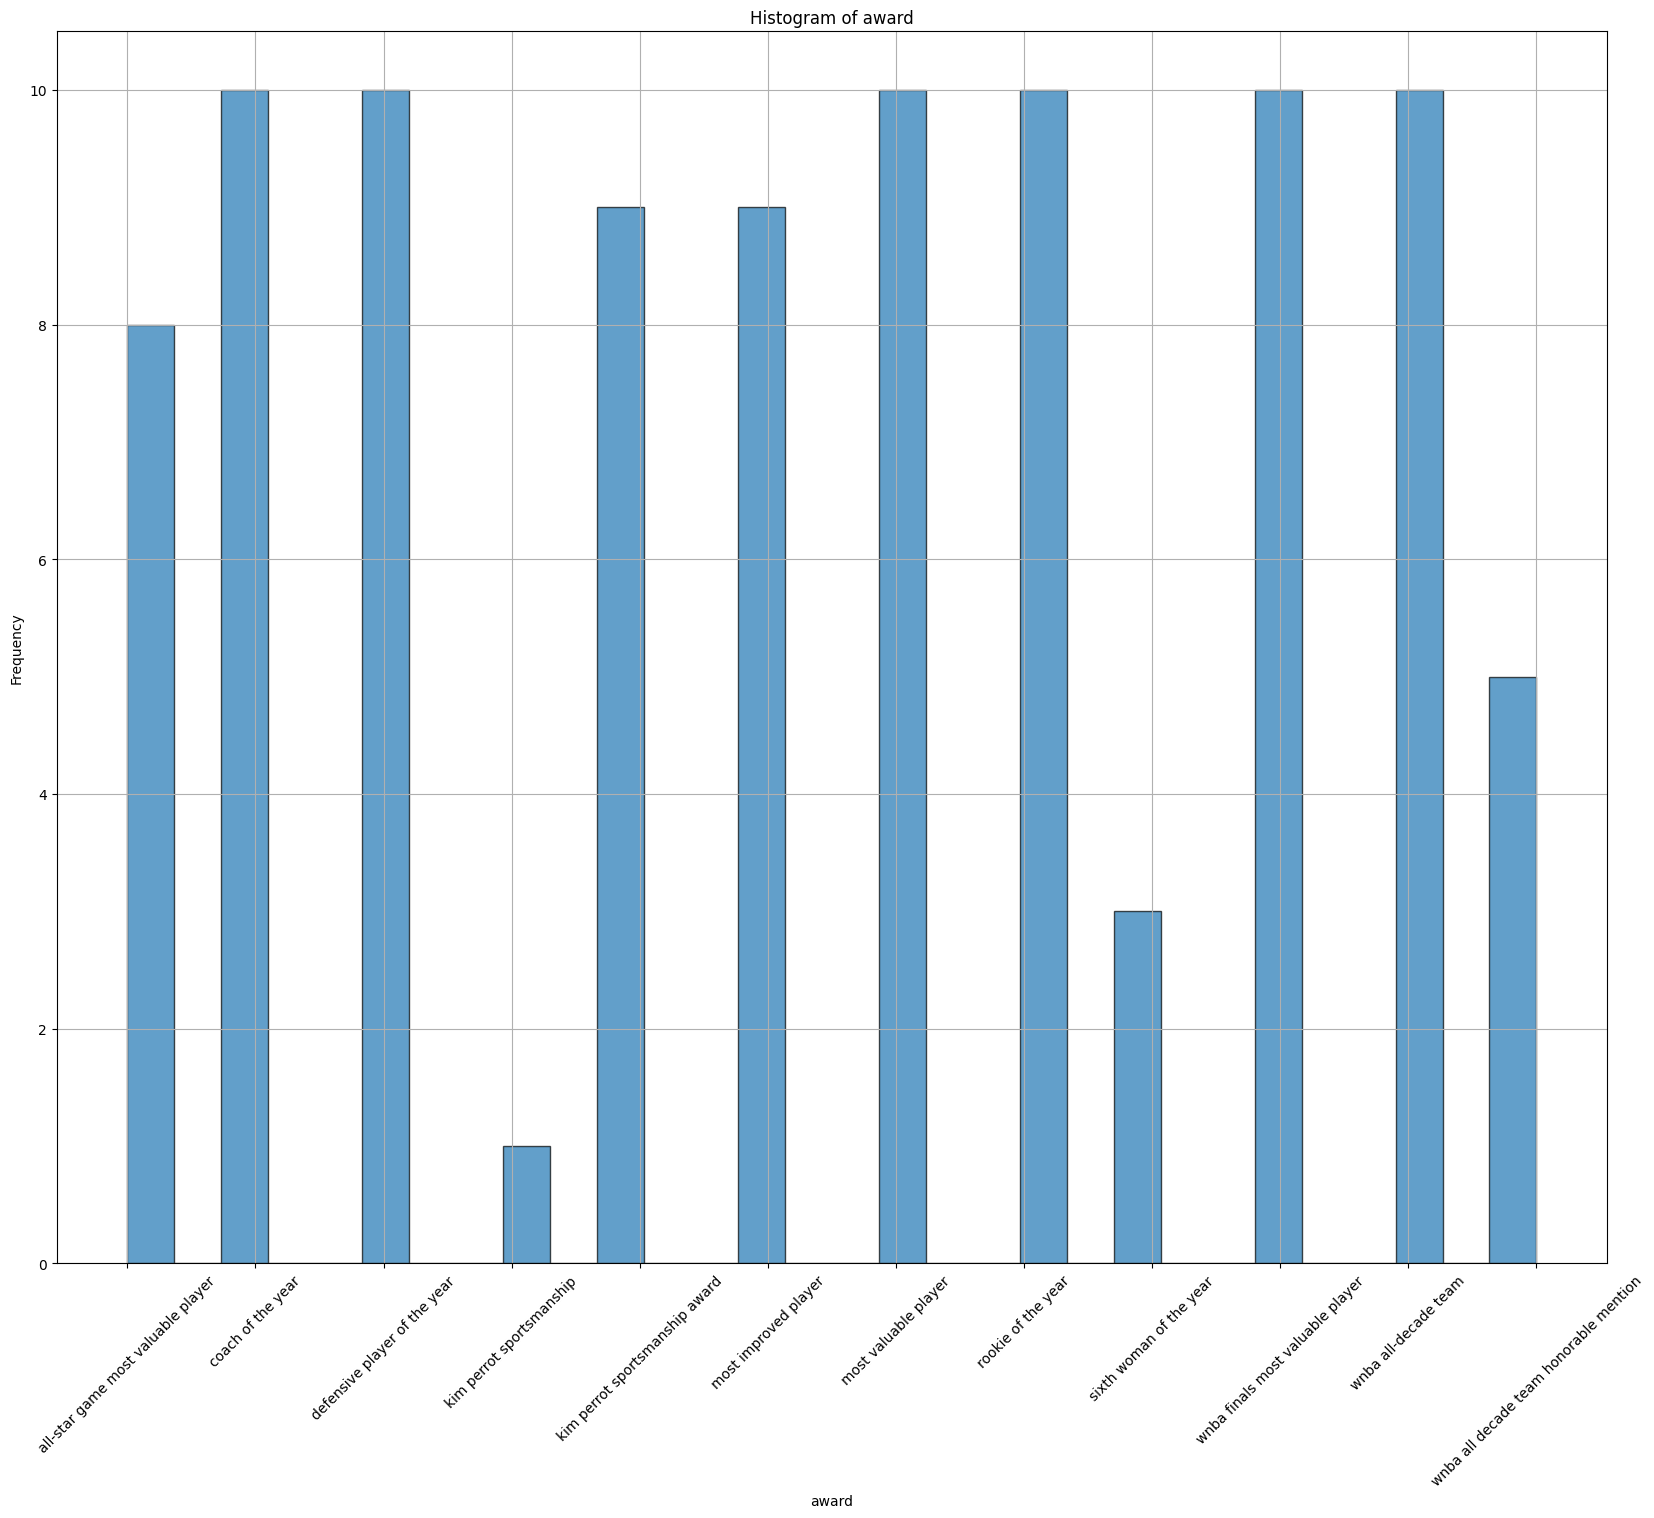

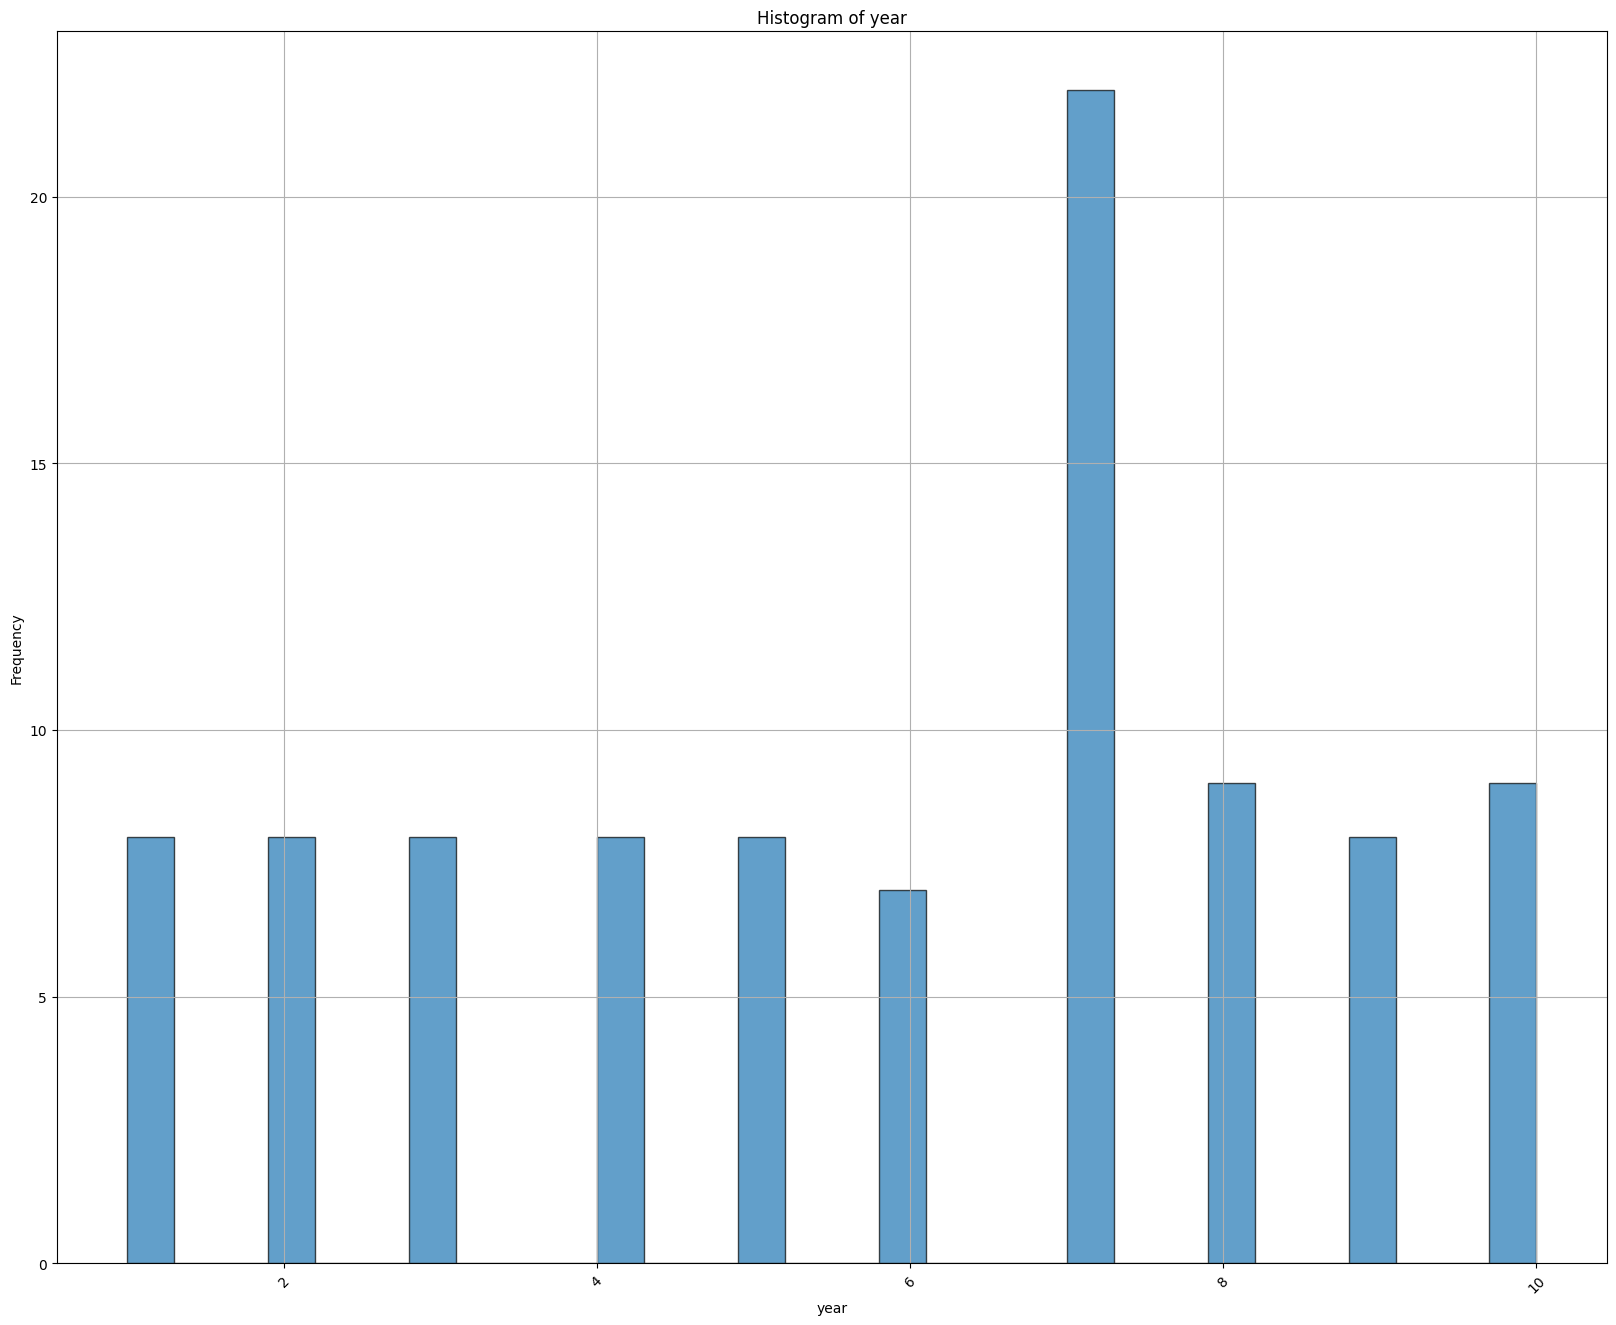

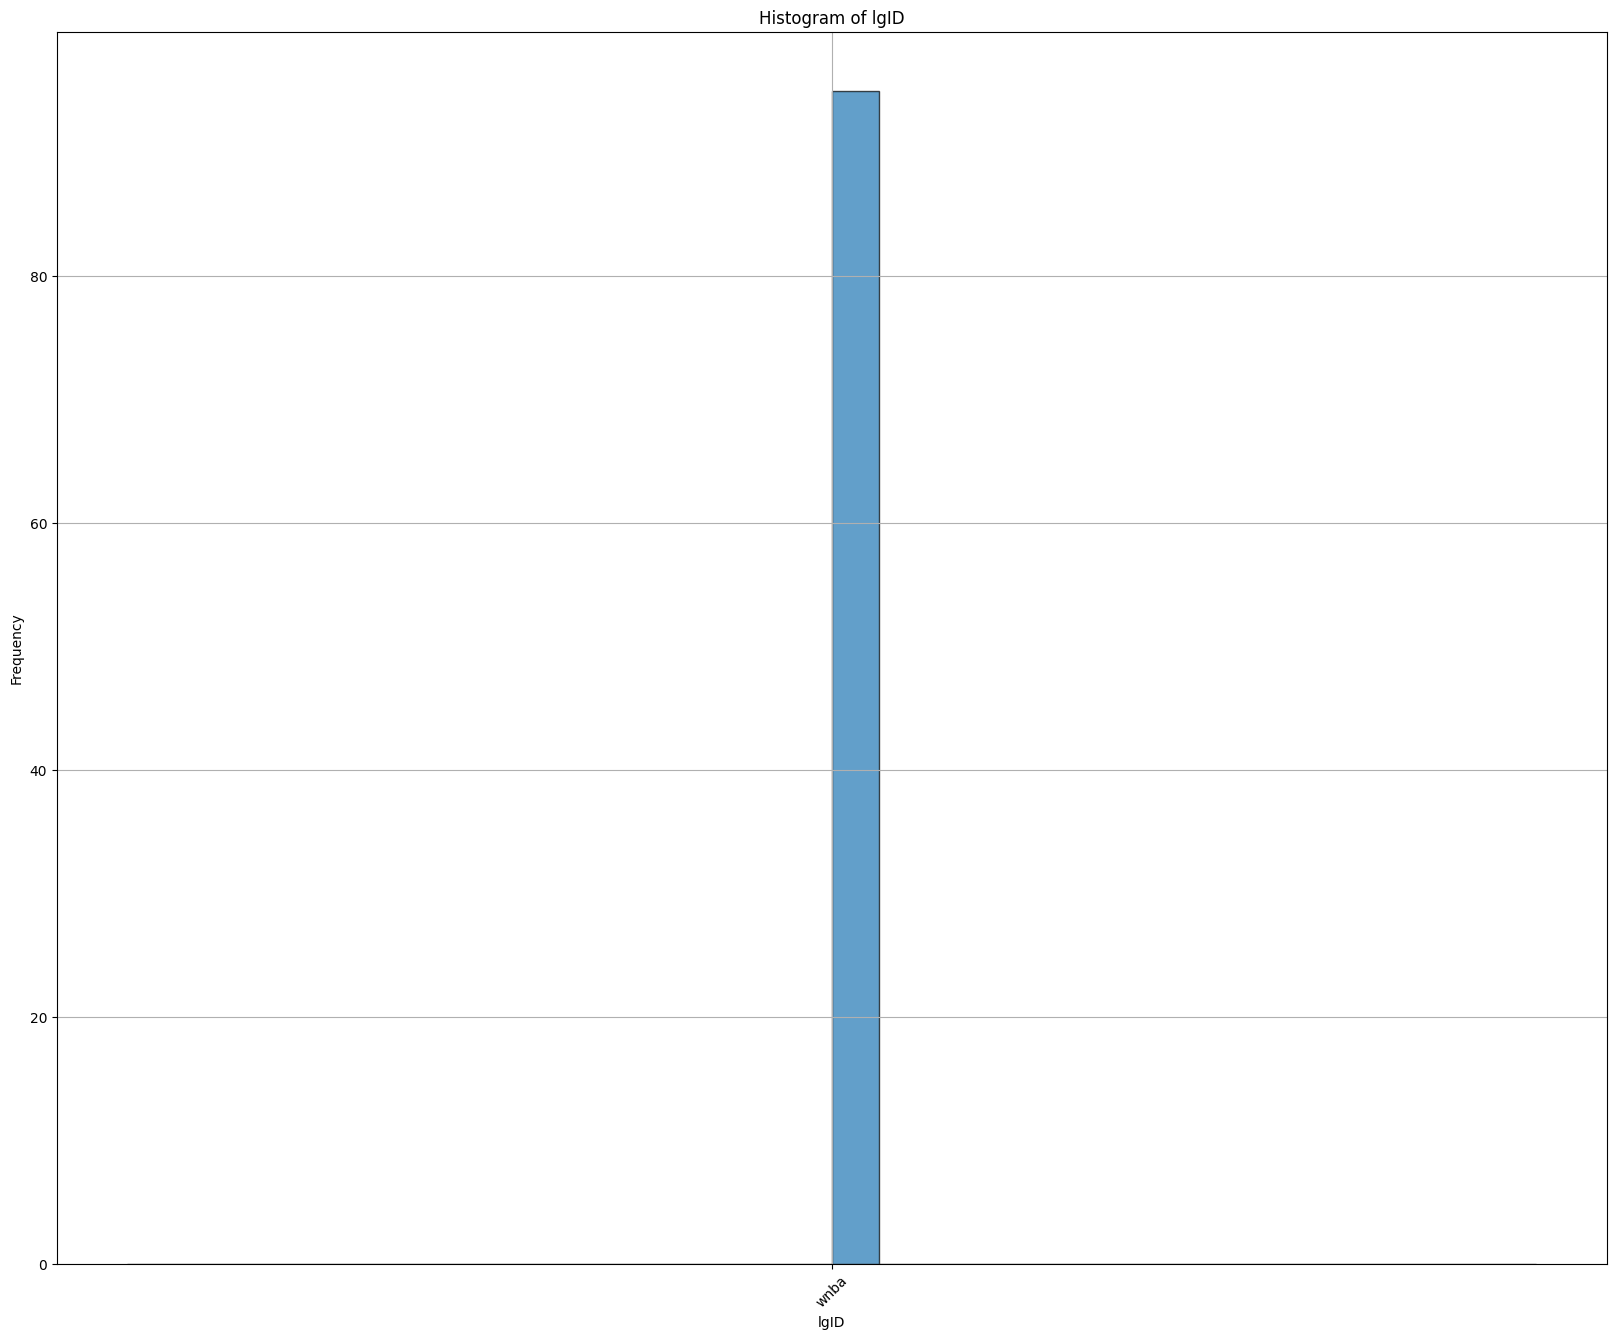

In [15]:
print(f"The distinct award are : {csv_awardsPlayers['award'].nunique()}")
print(f"The distinct year are : {csv_awardsPlayers['year'].nunique()}")
print(f"The distinct lgID are : {csv_awardsPlayers['lgID'].nunique()}")

# List of columns to create histograms for
columns = ['award', 'year', 'lgID',]

# Convert all string columns in the DataFrame to lowercase
for column in csv_awardsPlayers.columns:
    if csv_awardsPlayers[column].dtype == 'object':  # Check if the column contains strings
        csv_awardsPlayers[column] = csv_awardsPlayers[column].str.lower()
        
# Create histograms
for column in columns:
    plt.figure(figsize=(20, 16))
    plt.hist(csv_awardsPlayers[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    # Rotate the x labels for better readability
    plt.xticks(rotation=45)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

The distinct year are : 10
The distinct stint are : 3
The distinct won are : 29
The distinct lost are : 28
The distinct post wins are : 8
The distinct post losses are : 6


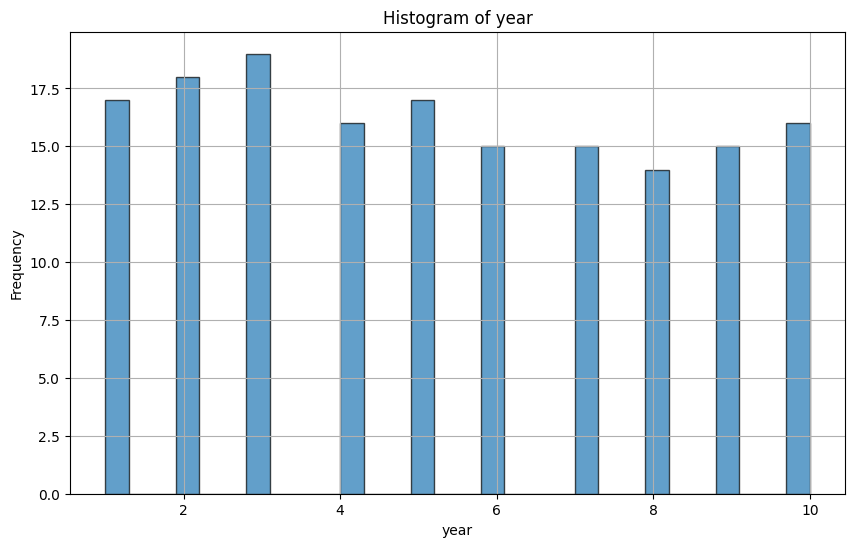

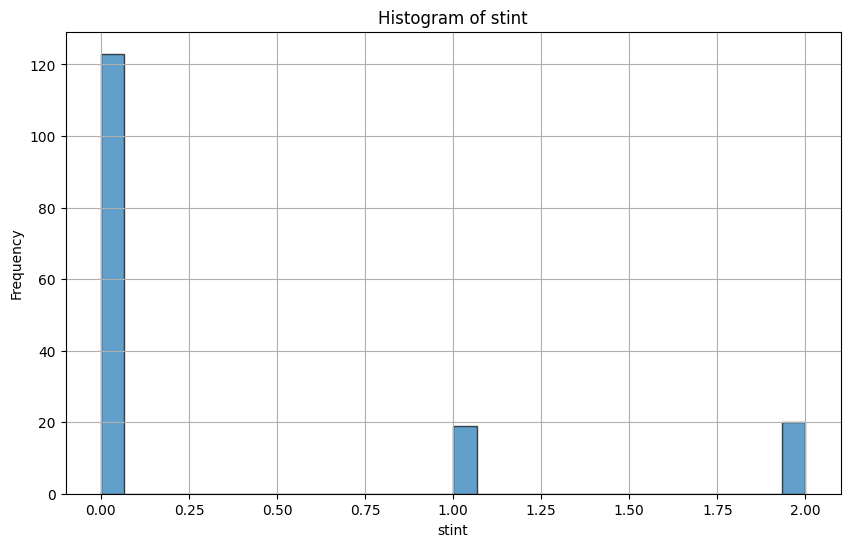

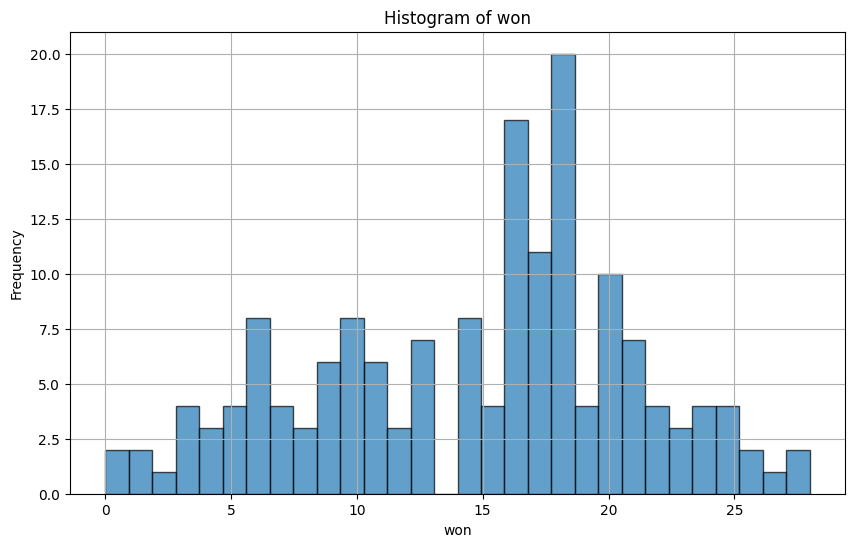

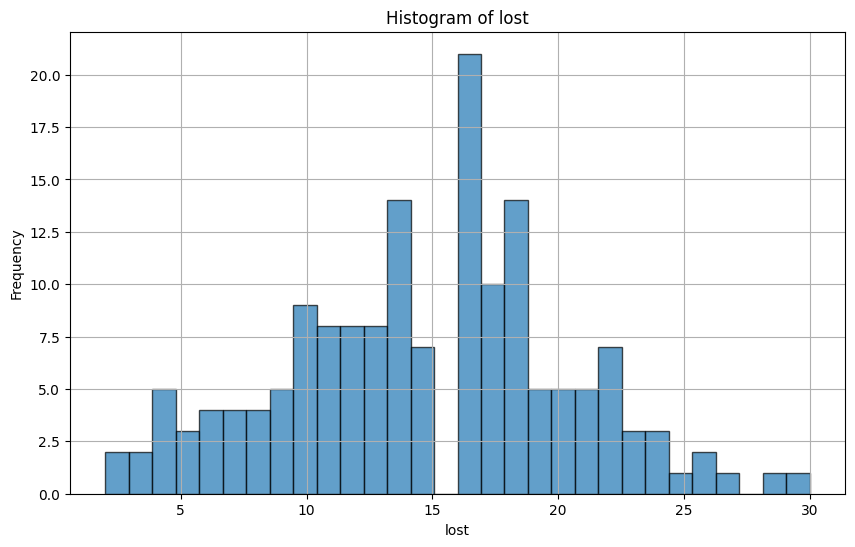

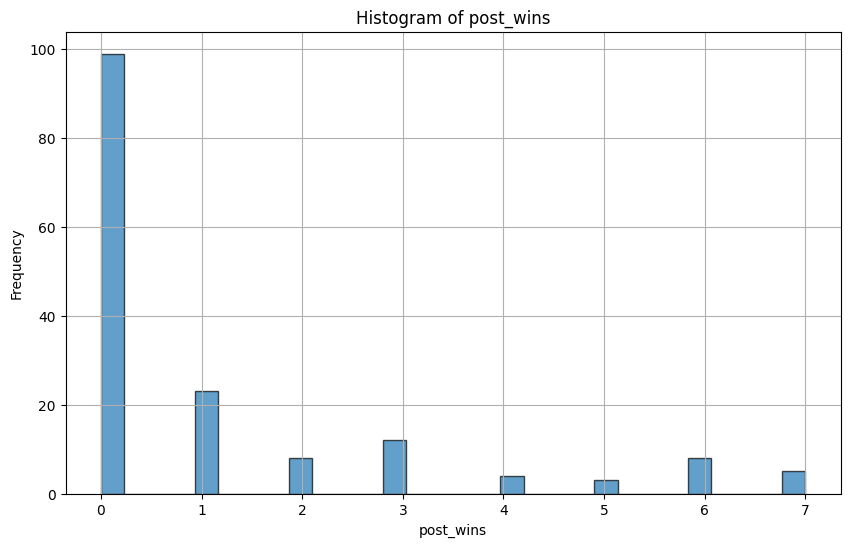

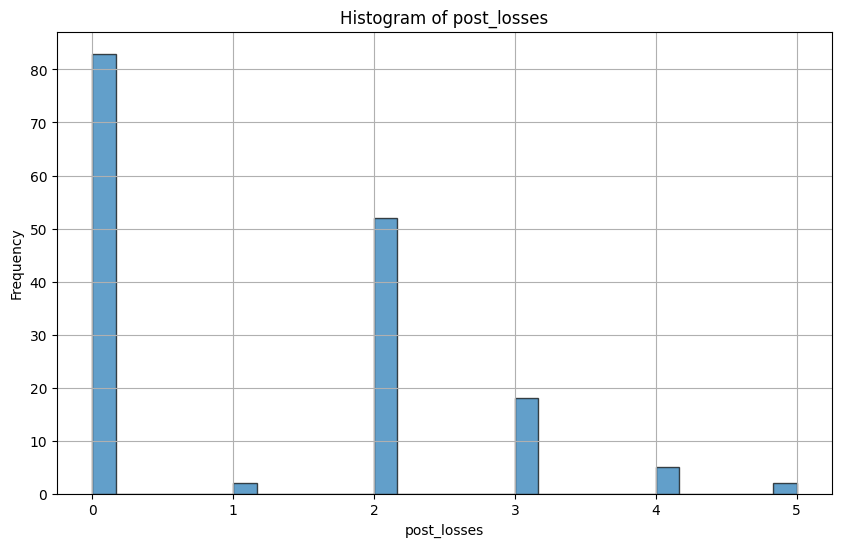

In [16]:
print(f"The distinct year are : {csv_coaches['year'].nunique()}")
print(f"The distinct stint are : {csv_coaches['stint'].nunique()}")
print(f"The distinct won are : {csv_coaches['won'].nunique()}")
print(f"The distinct lost are : {csv_coaches['lost'].nunique()}")
print(f"The distinct post wins are : {csv_coaches['post_wins'].nunique()}")
print(f"The distinct post losses are : {csv_coaches['post_losses'].nunique()}")




# List of columns to create histograms for
columns = ['year', 'stint', 'won','lost','post_wins', 'post_losses']

# Convert all string columns in the DataFrame to lowercase
for column in csv_coaches.columns:
    if csv_coaches[column].dtype == 'object':  # Check if the column contains strings
        csv_coaches[column] = csv_coaches[column].str.lower()
        
# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_coaches[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [17]:
# Check for missing values in each column of the csv_teams dataframe
missing_values = csv_coaches.isnull().sum()

# Display the missing values
for column, missing in missing_values.items():
    print(f"{column}: {missing}")

coachID: 0
year: 0
tmID: 0
lgID: 0
stint: 0
won: 0
lost: 0
post_wins: 0
post_losses: 0


In [18]:
# Check Duplicated Entries
duplicated_entries = csv_coaches[csv_coaches.duplicated(subset=['coachID', 'year'], keep=False)]

# Check Year Range
year_range_issue = csv_coaches[(csv_coaches['year'] < 1)]

# Check Logical Consistency
logical_inconsistency = csv_coaches[(csv_coaches['won'] > csv_coaches['lost']) & (csv_coaches['lost'] >= csv_coaches['won'])]

# Display Results
print("\nDuplicated Entries:")
print(duplicated_entries)

print("\nYear Range Issues:")
print(year_range_issue)

print("\nLogical Inconsistencies:")
print(logical_inconsistency)



Duplicated Entries:
Empty DataFrame
Columns: [coachID, year, tmID, lgID, stint, won, lost, post_wins, post_losses]
Index: []

Year Range Issues:
Empty DataFrame
Columns: [coachID, year, tmID, lgID, stint, won, lost, post_wins, post_losses]
Index: []

Logical Inconsistencies:
Empty DataFrame
Columns: [coachID, year, tmID, lgID, stint, won, lost, post_wins, post_losses]
Index: []


# Awards Players

In [19]:
# Check for missing values in each column of the csv_teams dataframe
missing_values = csv_awardsPlayers.isnull().sum()

# Display the missing values
for column, missing in missing_values.items():
    print(f"{column}: {missing}")

playerID: 0
award: 0
year: 0
lgID: 0


There are no missing values on the awards_playerscsv.

#### Group by award and playerID
* Why: To understand which players have won multiple awards and what types of awards they have won.
* Use Case: Useful for identifying top-performing players who have won multiple categories of awards.

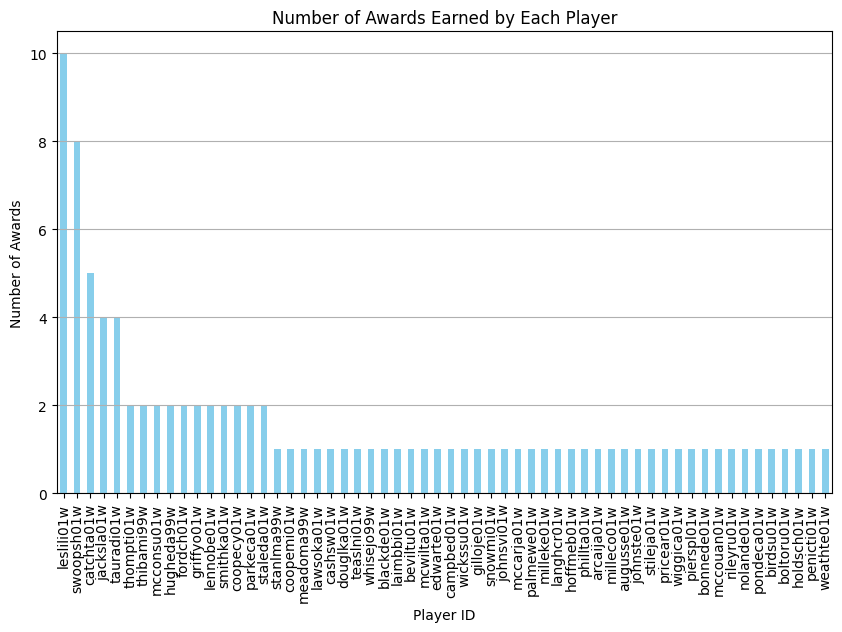

In [20]:
# List of standard award names
standard_awards = [
    'all-star game most valuable player', 'coach of the year', 'defensive player of the year',
    'kim perrot sportsmanship award', 'most improved player', 'most valuable player',
    'rookie of the year', 'sixth woman of the year', 'wnba all decade team honorable mention',
    'wnba all-decade team', 'wnba finals most valuable player'
]

# Function to normalize award names
def normalize_award_name(award_name):
    award_name = award_name.lower().replace(' awards', ' award').strip()
    # Check in the standard awards list if there is any exact match 
    for standard_award in standard_awards:
        if award_name == standard_award:
            return award_name
    else:  
        # Search for a similar award name in the standard awards list
        for standard_award in standard_awards:
            if award_name in standard_award:
                return standard_award

# Apply normalization to the 'award' column
csv_awardsPlayers['normalized_award'] = csv_awardsPlayers['award'].apply(normalize_award_name)

# Merge the playerID from the csv_awardsPlayers with the bioID from the csv_players
merged_awards_players = pd.merge(csv_awardsPlayers, csv_players, left_on='playerID', right_on='bioID')


# Get the playerID and normalized_award columns where the normalized_award is not null

grouped_by_award_player = merged_awards_players[['playerID', 'normalized_award']].dropna()


# Plot the awards earned by each player in a bar chart and where the y axis the playerID and the x axis is the number of awards earned
plt.figure(figsize=(10, 6))
grouped_by_award_player['playerID'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Awards Earned by Each Player')
plt.xlabel('Player ID')
plt.ylabel('Number of Awards')
plt.grid(axis='y')

# Teams Post

The distinct year are : 10
The distinct team ID are : 18
The distinct wins are : 8
The distinct losses are : 6


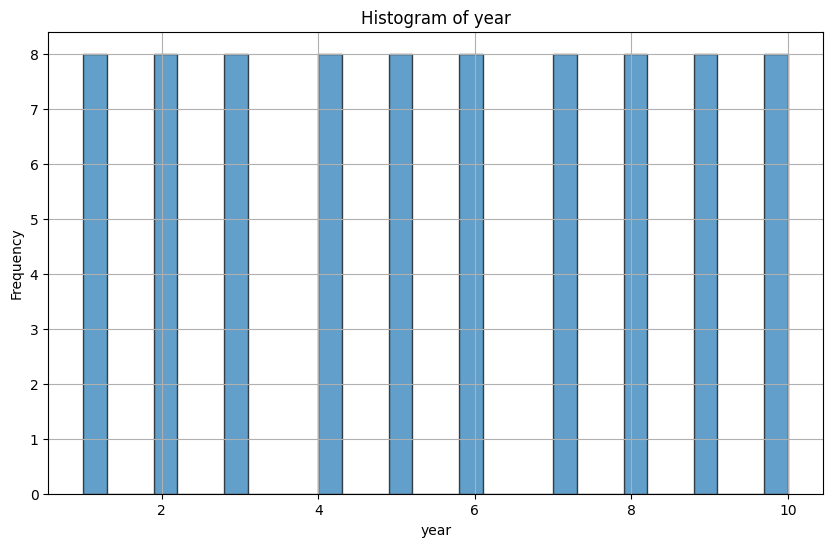

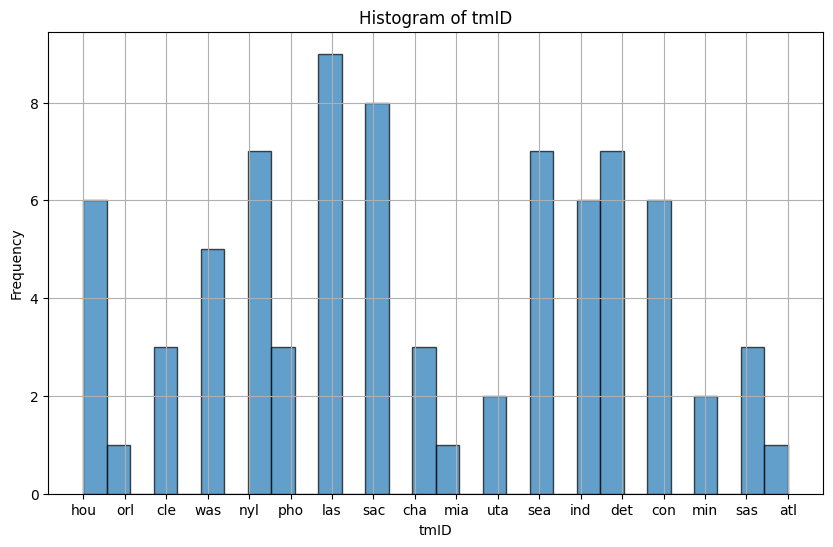

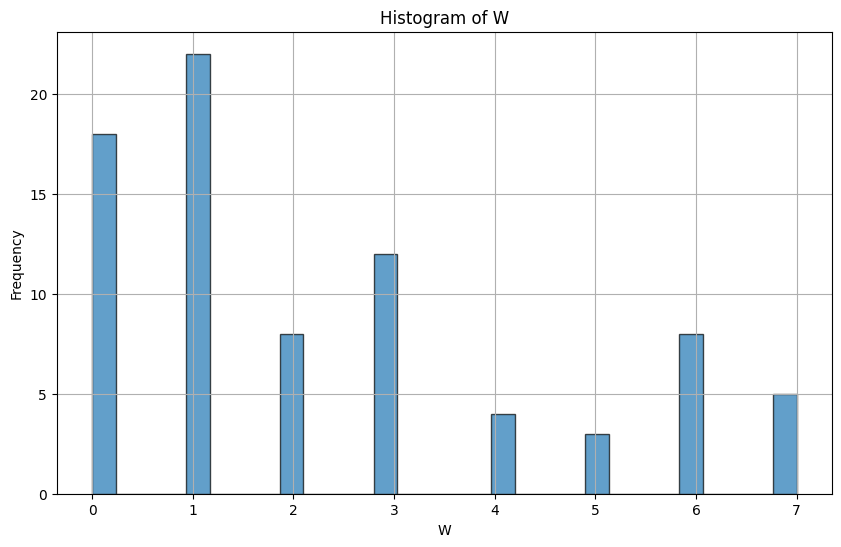

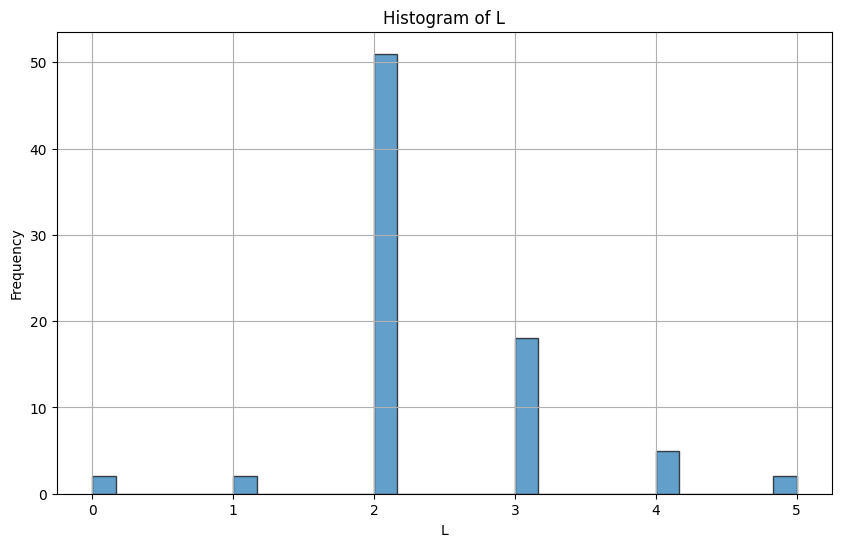

In [21]:
print(f"The distinct year are : {csv_teamsPost['year'].nunique()}")
print(f"The distinct team ID are : {csv_teamsPost['tmID'].nunique()}")
print(f"The distinct wins are : {csv_teamsPost['W'].nunique()}")
print(f"The distinct losses are : {csv_teamsPost['L'].nunique()}")





# List of columns to create histograms for
columns = ['year', 'tmID', 'W','L']

# Convert all string columns in the DataFrame to lowercase
for column in csv_teamsPost.columns:
    if csv_teamsPost[column].dtype == 'object':  # Check if the column contains strings
        csv_teamsPost[column] = csv_teamsPost[column].str.lower()
        
# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_teamsPost[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [22]:

# Check for Missing Values
print("Missing Values:")
print(csv_teamsPost.isnull().sum())

# Check for Duplicates
duplicates = csv_teamsPost.duplicated().sum()
print(f"\nNumber of Duplicates: {duplicates}")

# Ensure Logical Consistency
# Check for negative values and that wins do not exceed total games
logical_inconsistencies = csv_teamsPost[(csv_teamsPost['W'] < 0) | (csv_teamsPost['L'] < 0) | (csv_teamsPost['W'] > (csv_teamsPost['W'] + csv_teamsPost['L']))]
print("\nLogical Inconsistencies:")
print(logical_inconsistencies)


Missing Values:
year    0
tmID    0
lgID    0
W       0
L       0
dtype: int64

Number of Duplicates: 0

Logical Inconsistencies:
Empty DataFrame
Columns: [year, tmID, lgID, W, L]
Index: []


### check team post and coaches post-season records consistency

In [23]:
# Merge DataFrames on year and tmID
merged_df = pd.merge(csv_coaches, csv_teamsPost, on=['year', 'tmID'], suffixes=('_coach', '_team'))

# Check for Consistency in Wins and Losses
inconsistencies = merged_df[
    (merged_df['post_wins'] != merged_df['W']) | 
    (merged_df['post_losses'] != merged_df['L'])
]

# Display Results
print("Inconsistencies Between Coaches and Team post-season Records:")
print(inconsistencies[['coachID', 'year', 'tmID', 'post_wins', 'W', 'post_losses', 'L']])

Inconsistencies Between Coaches and Team post-season Records:
       coachID  year tmID  post_wins  W  post_losses  L
4   adubari99w     5  nyl          0  2            0  3
10  allenso99w     2  sac          0  3            0  2
12  bibbyhe01w     6  las          0  0            0  2
27  coopemi01w     5  las          0  1            0  2
35  darscna99w     1  was          0  0            0  2
49  willifr99w     2  uta          0  0            0  2
64  laimbbi01w    10  det          0  3            0  2
68  mchugma99w     4  sac          0  3            0  3


Several coaches have a record of 0 post-season wins (post_wins), while their respective teams have recorded wins (W) same with losses

# Outliers per position

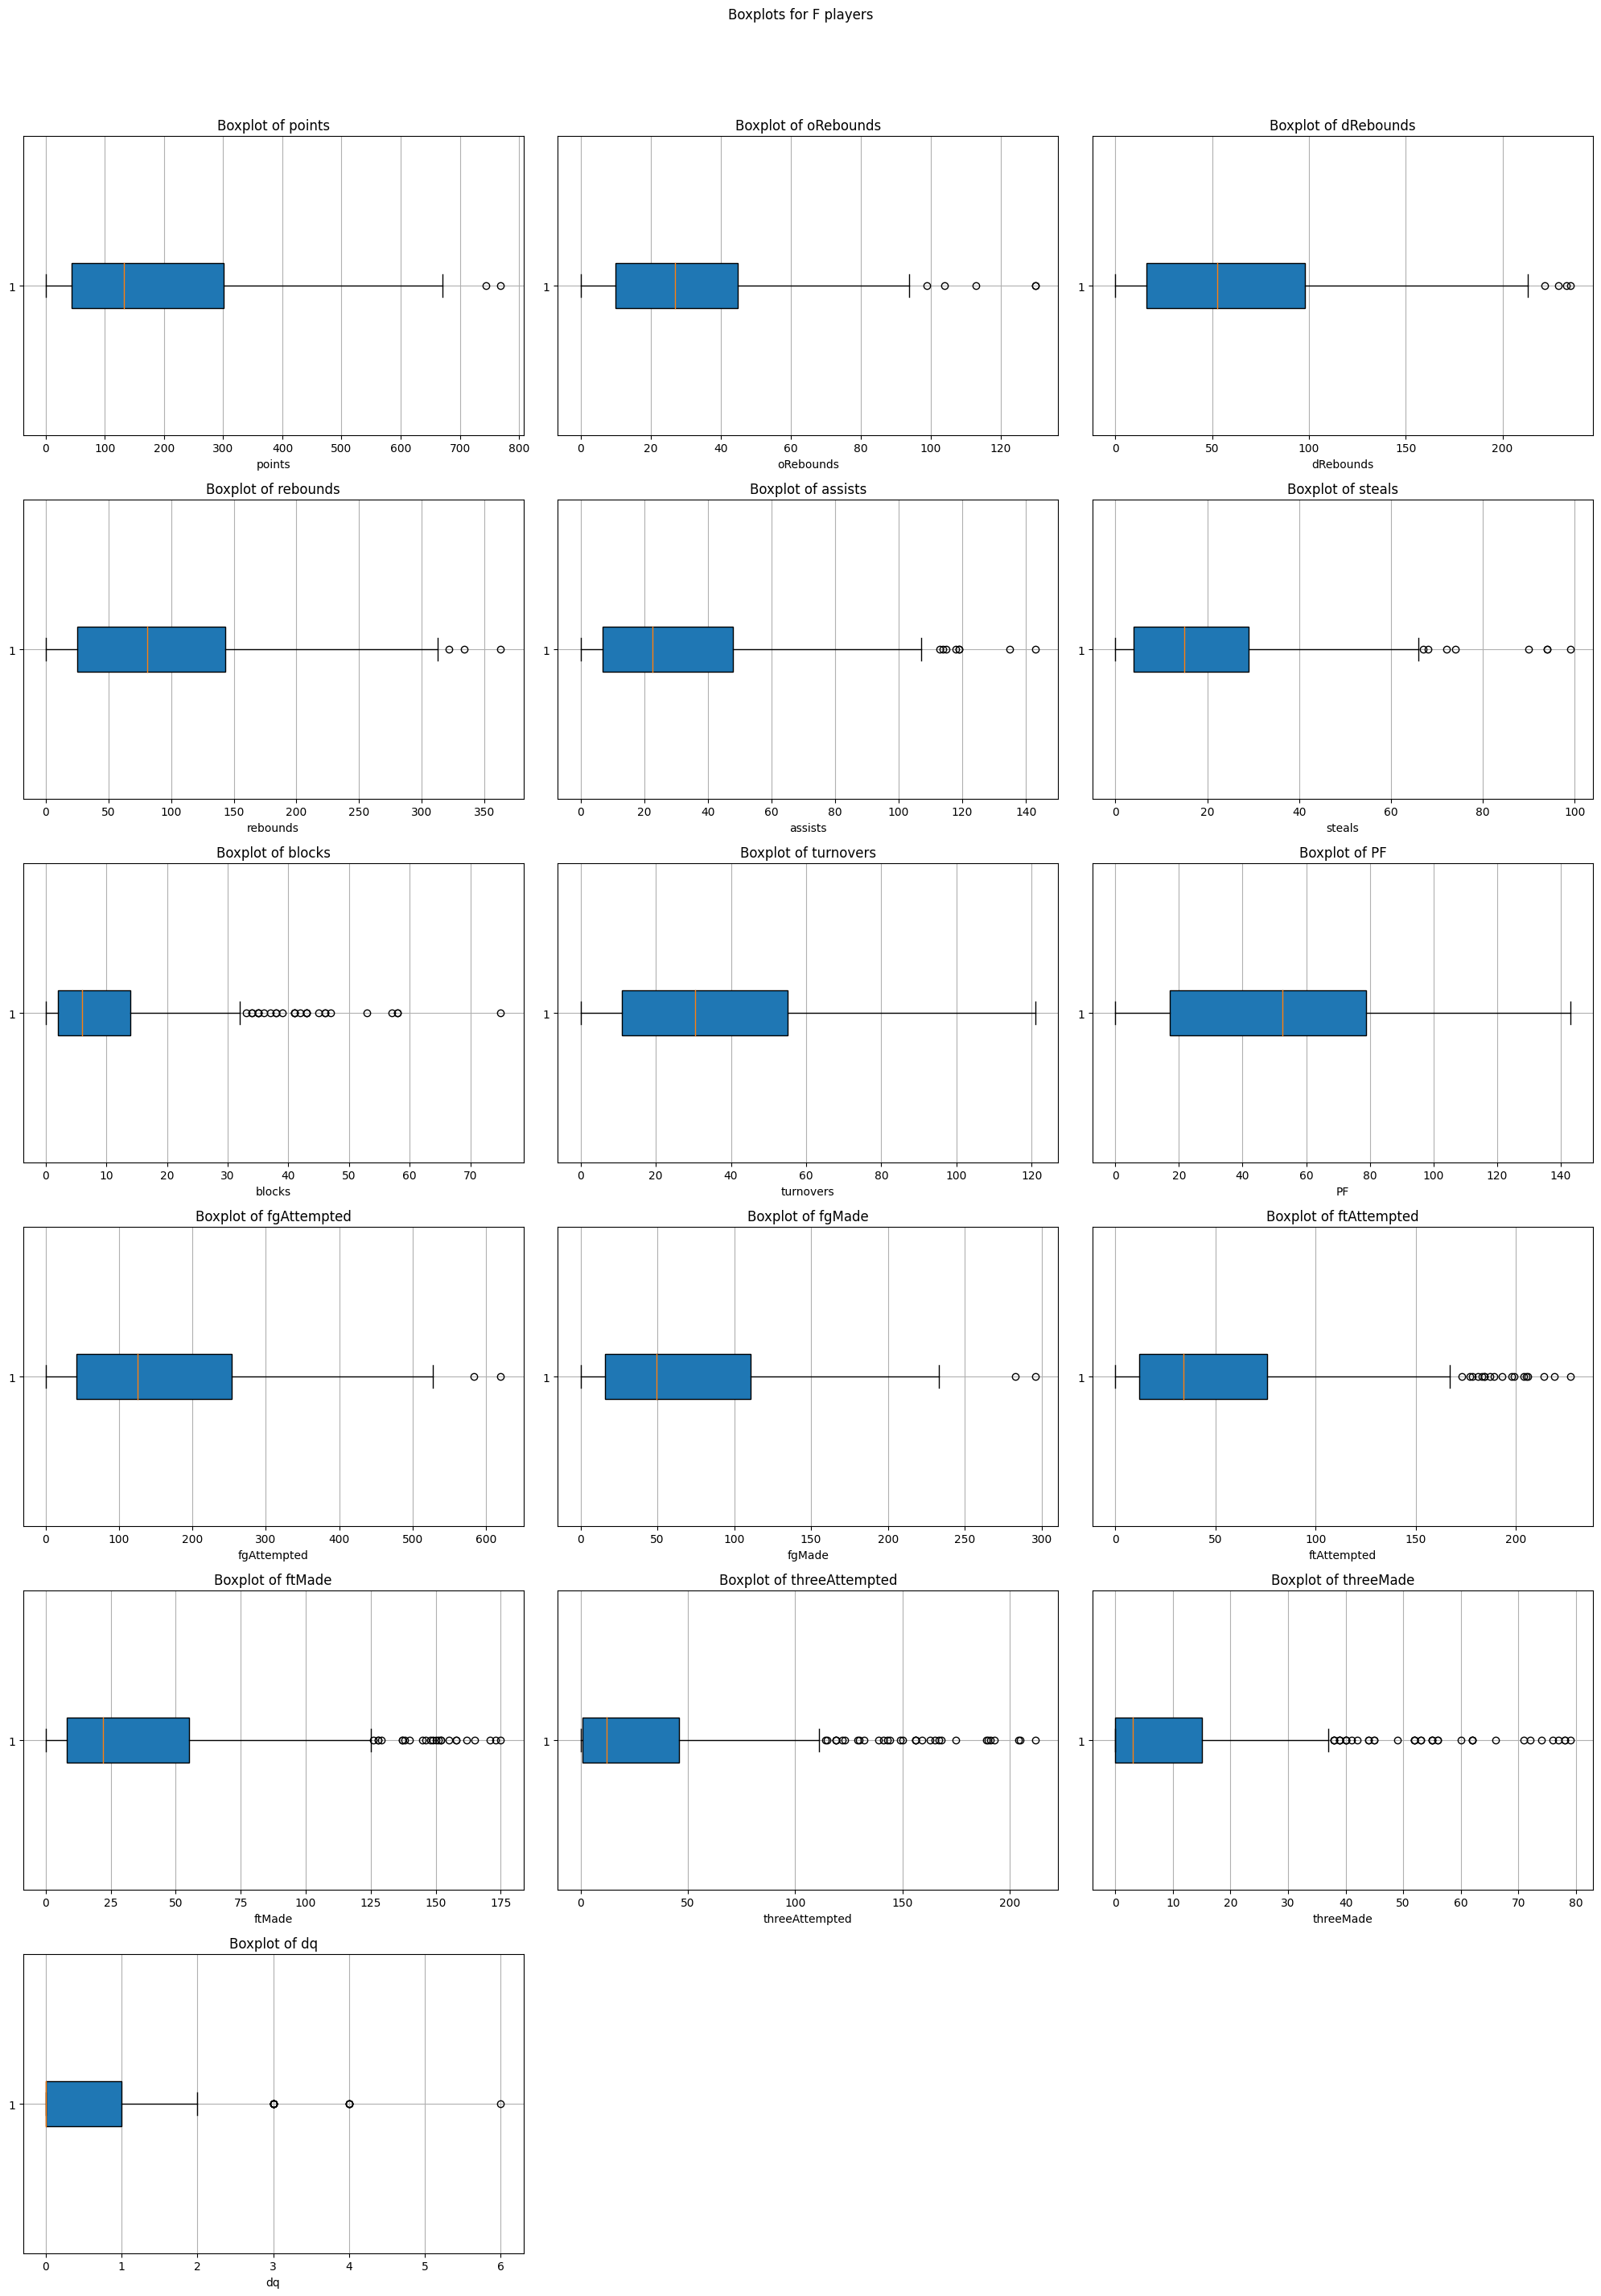

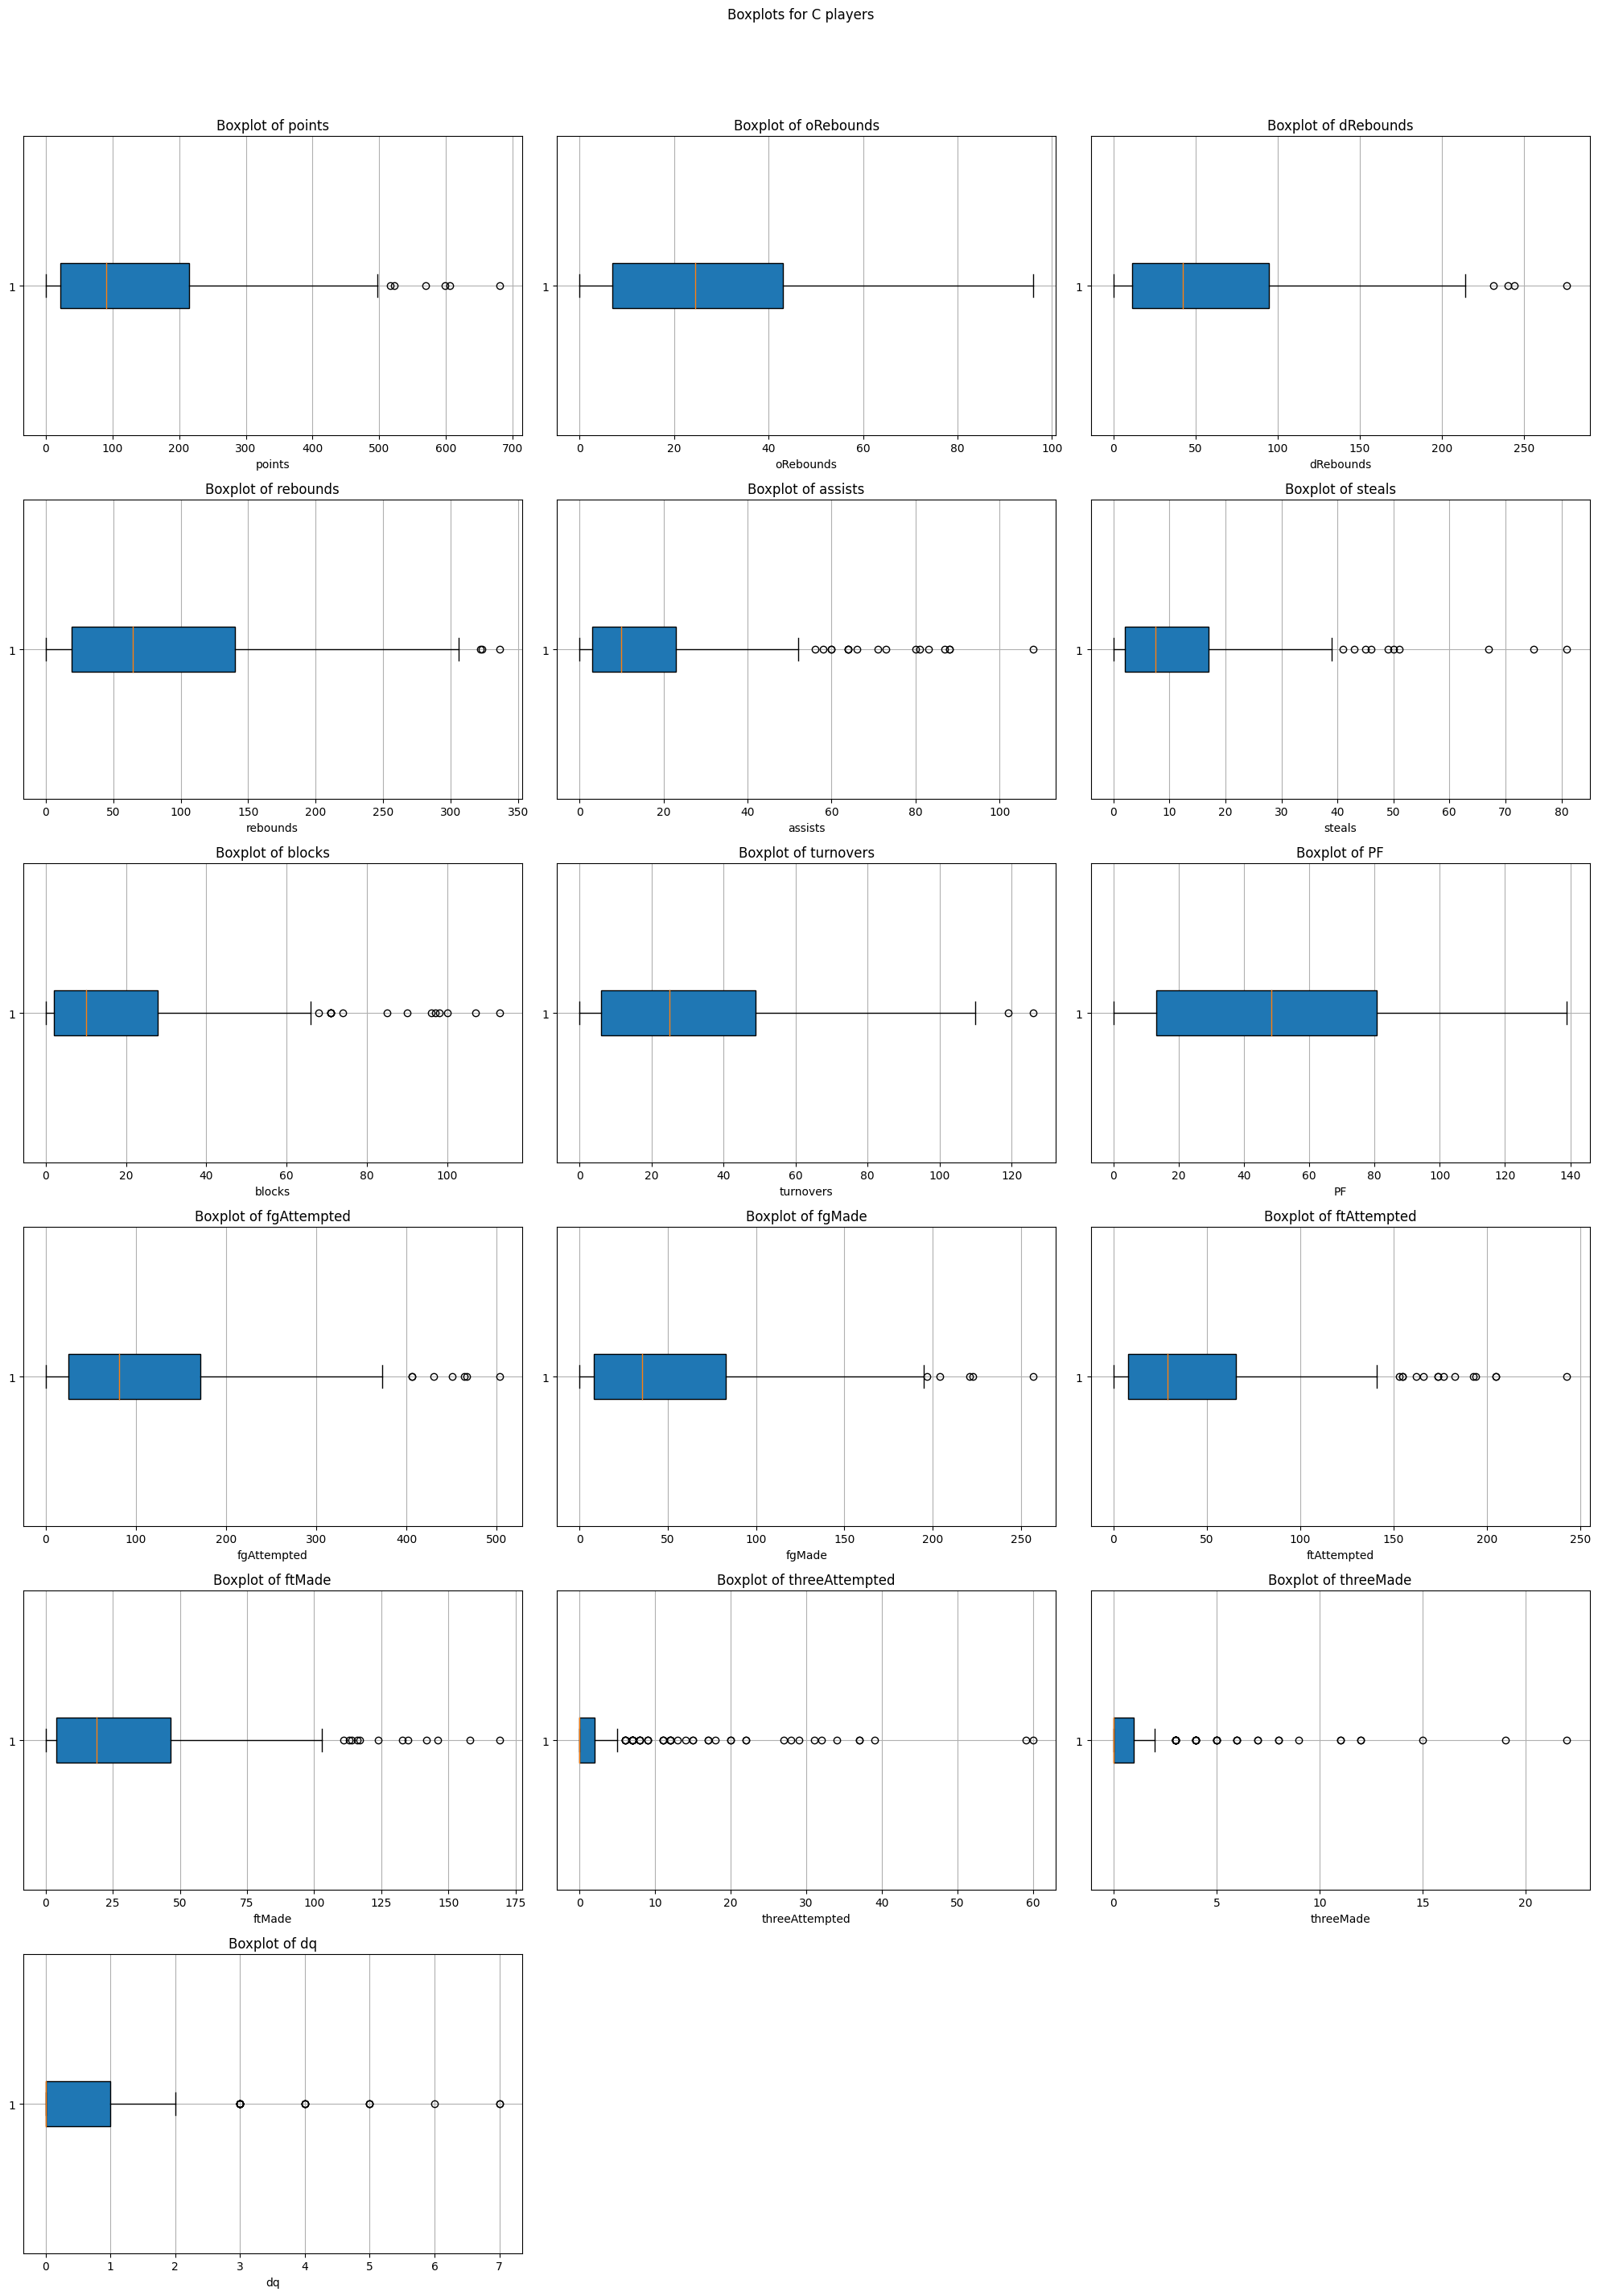

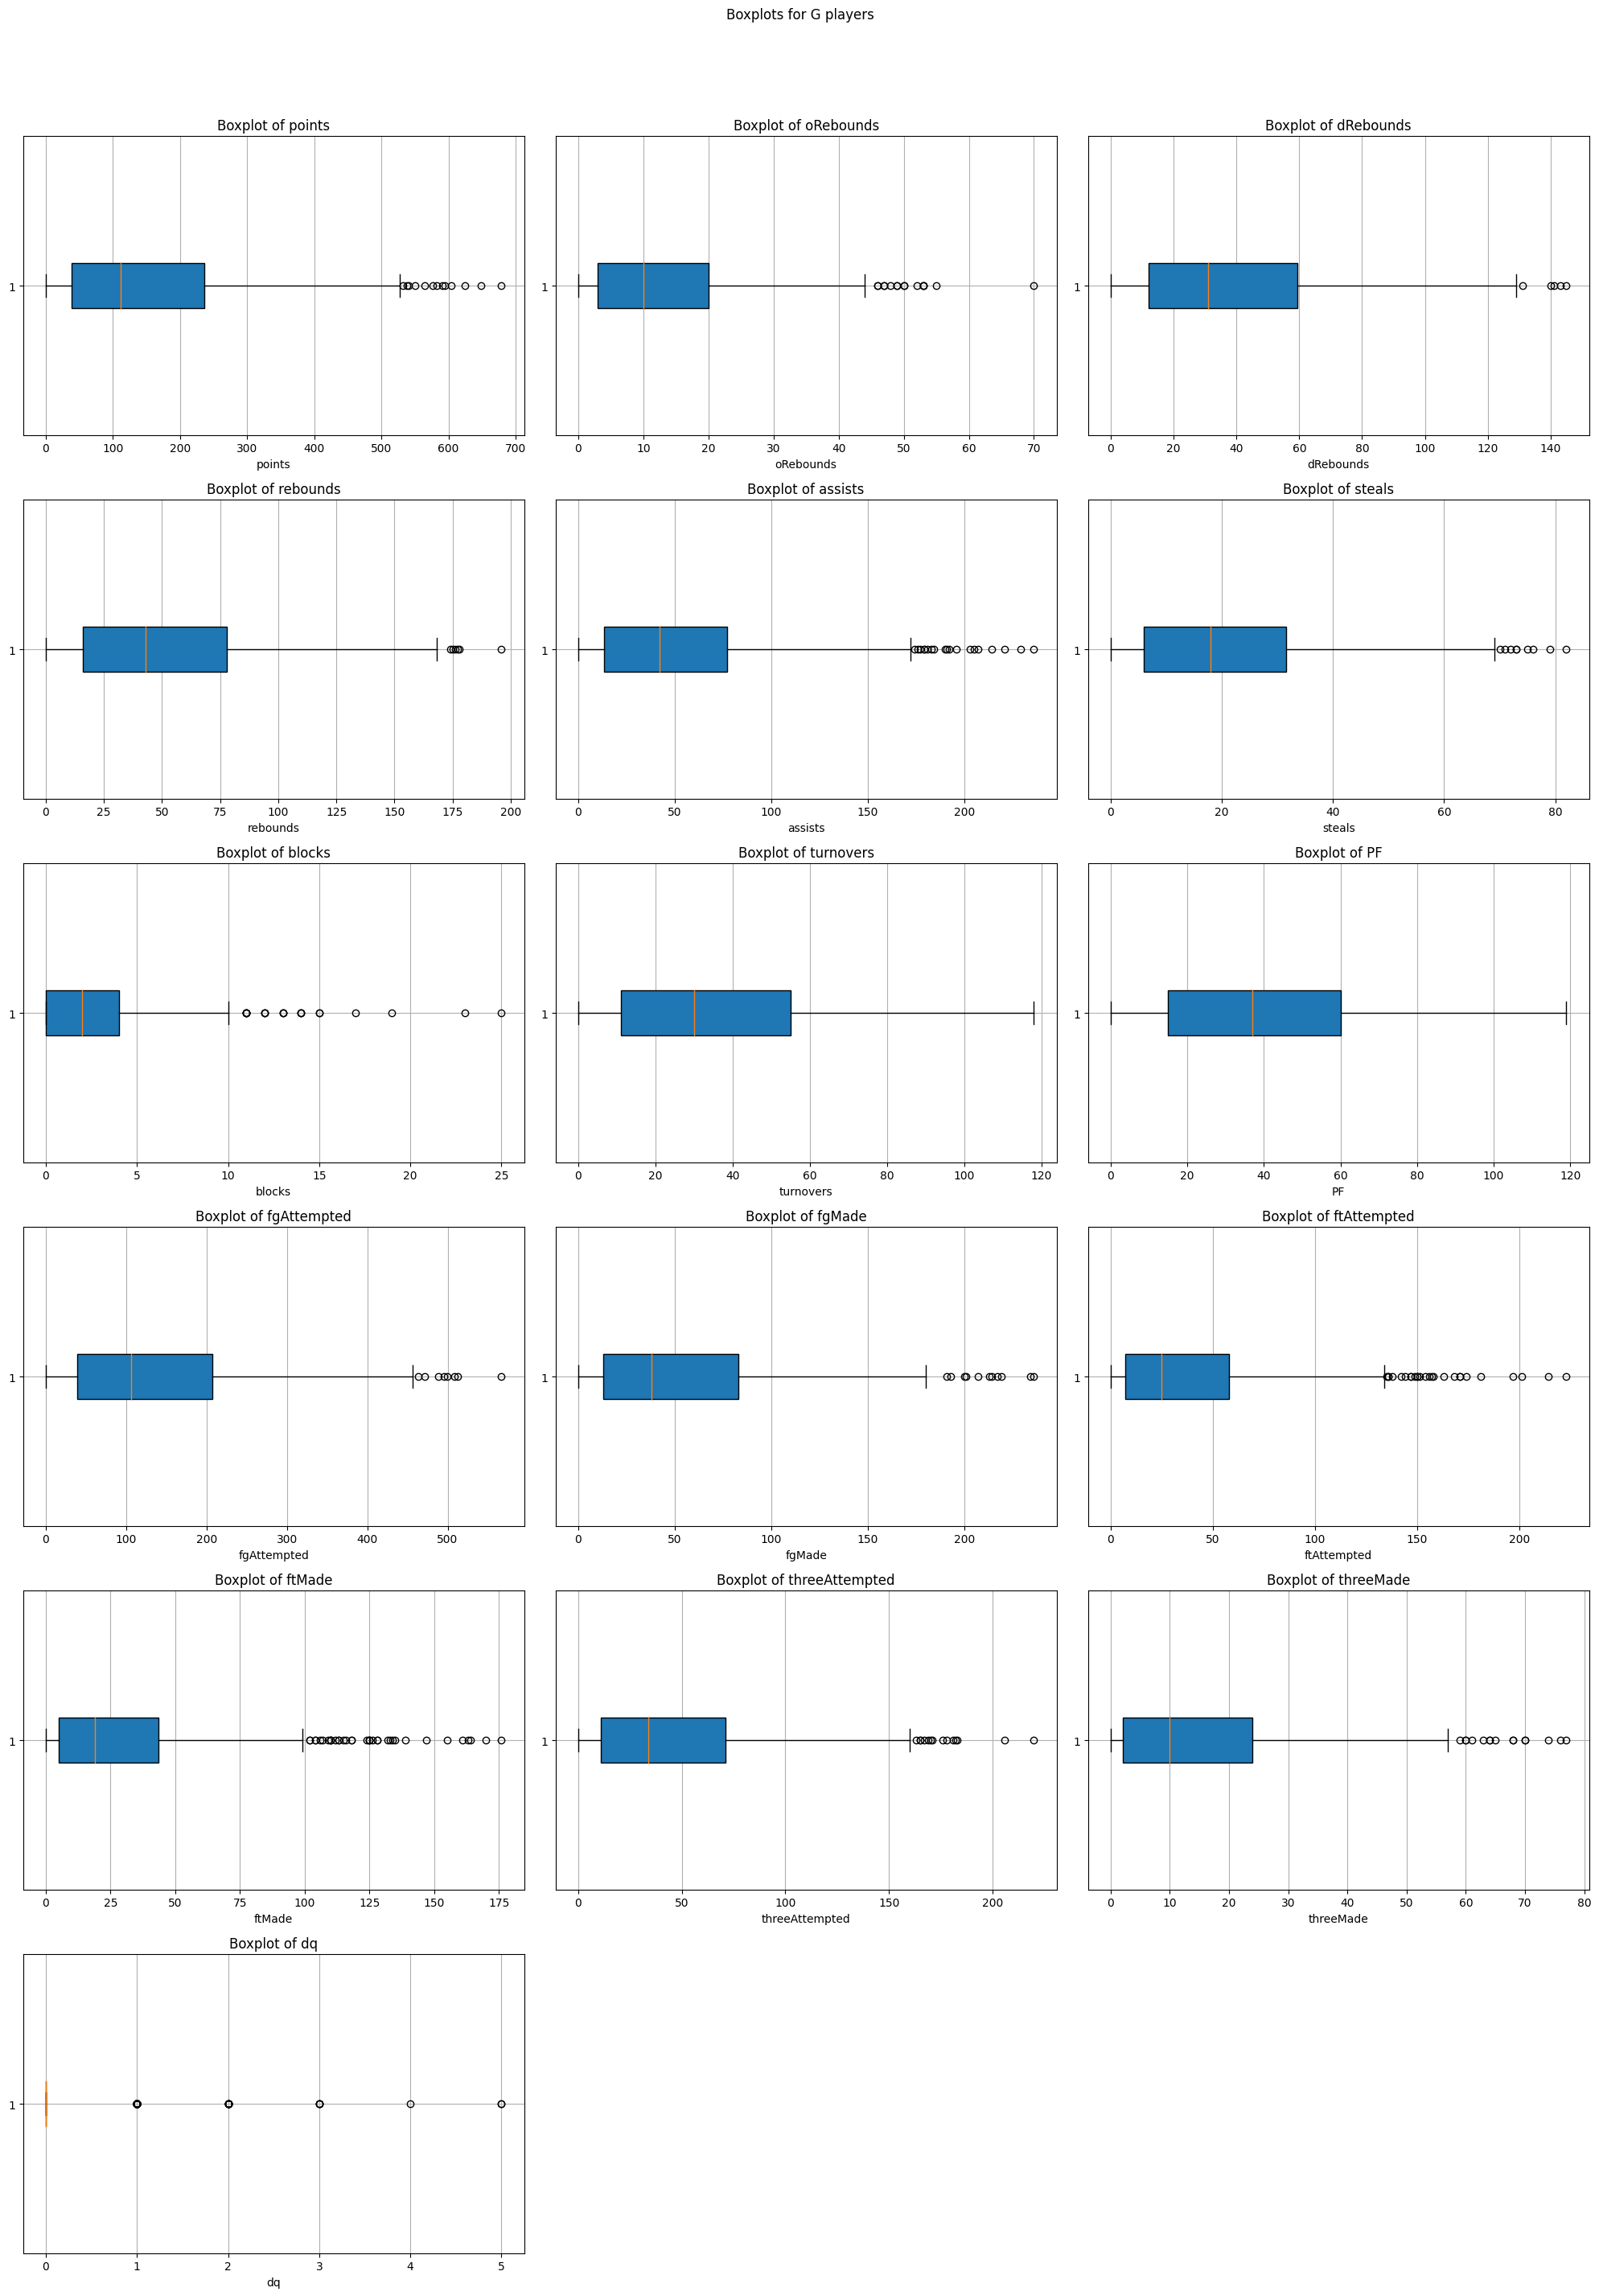

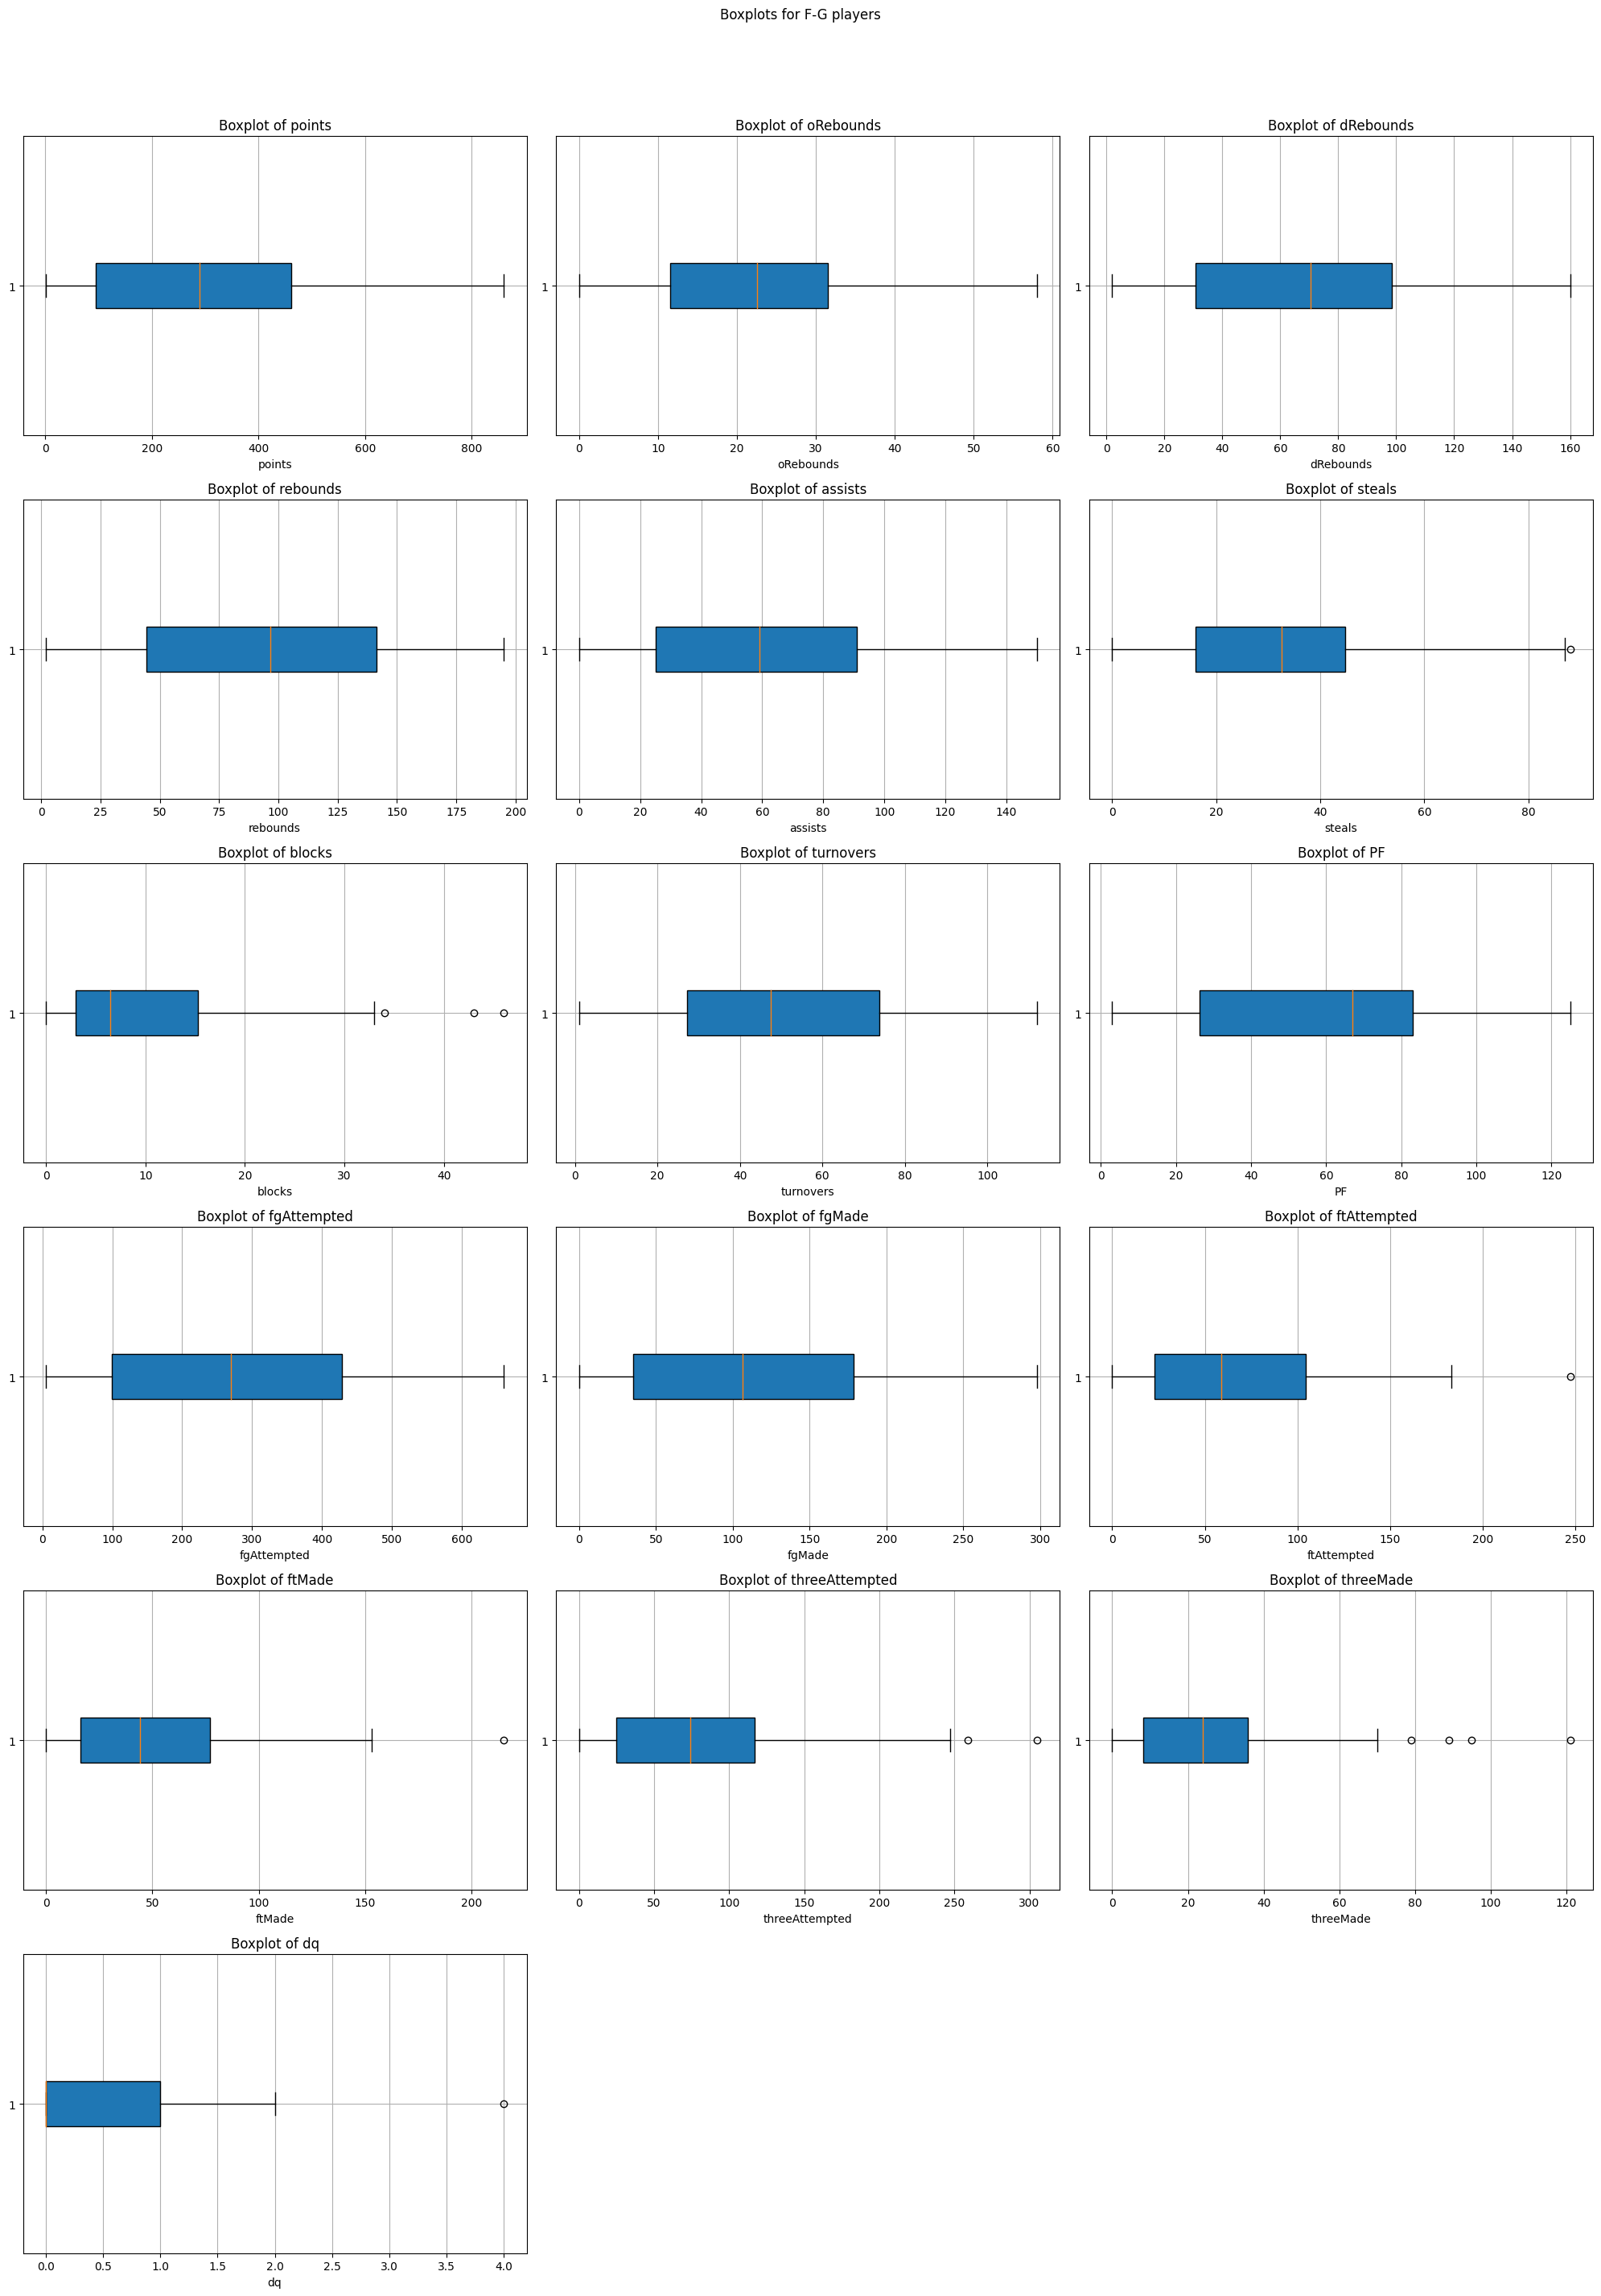

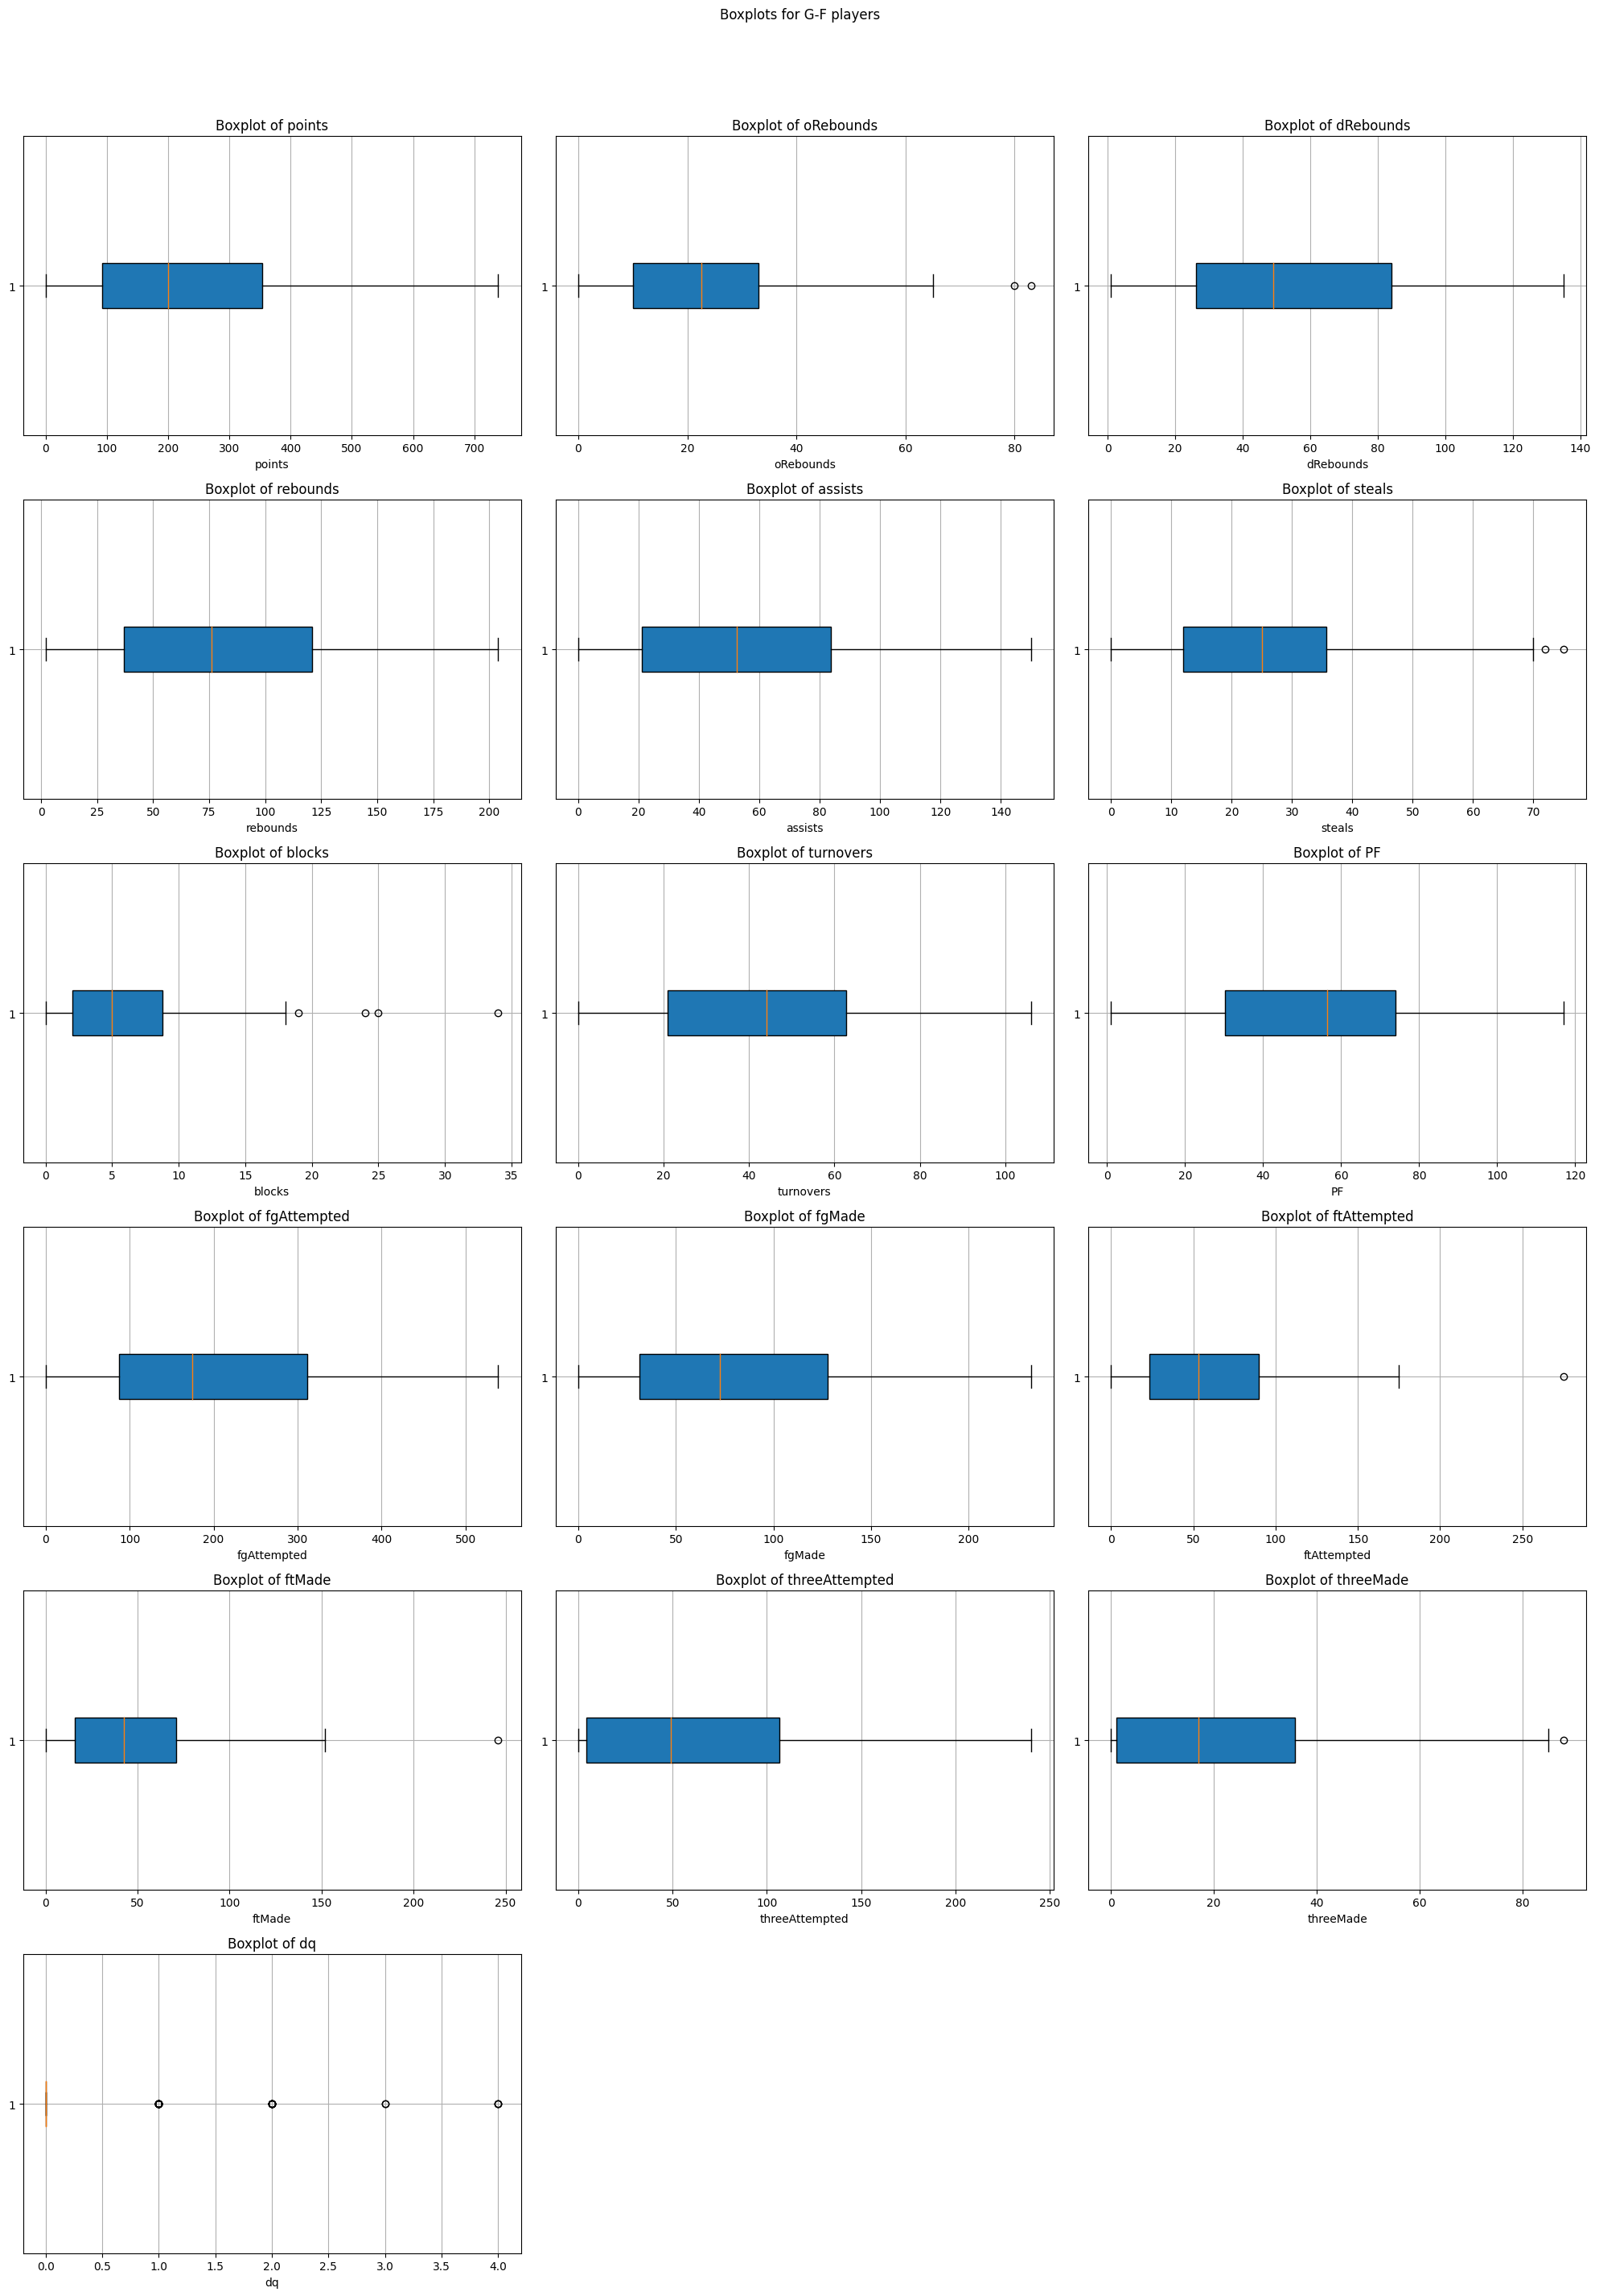

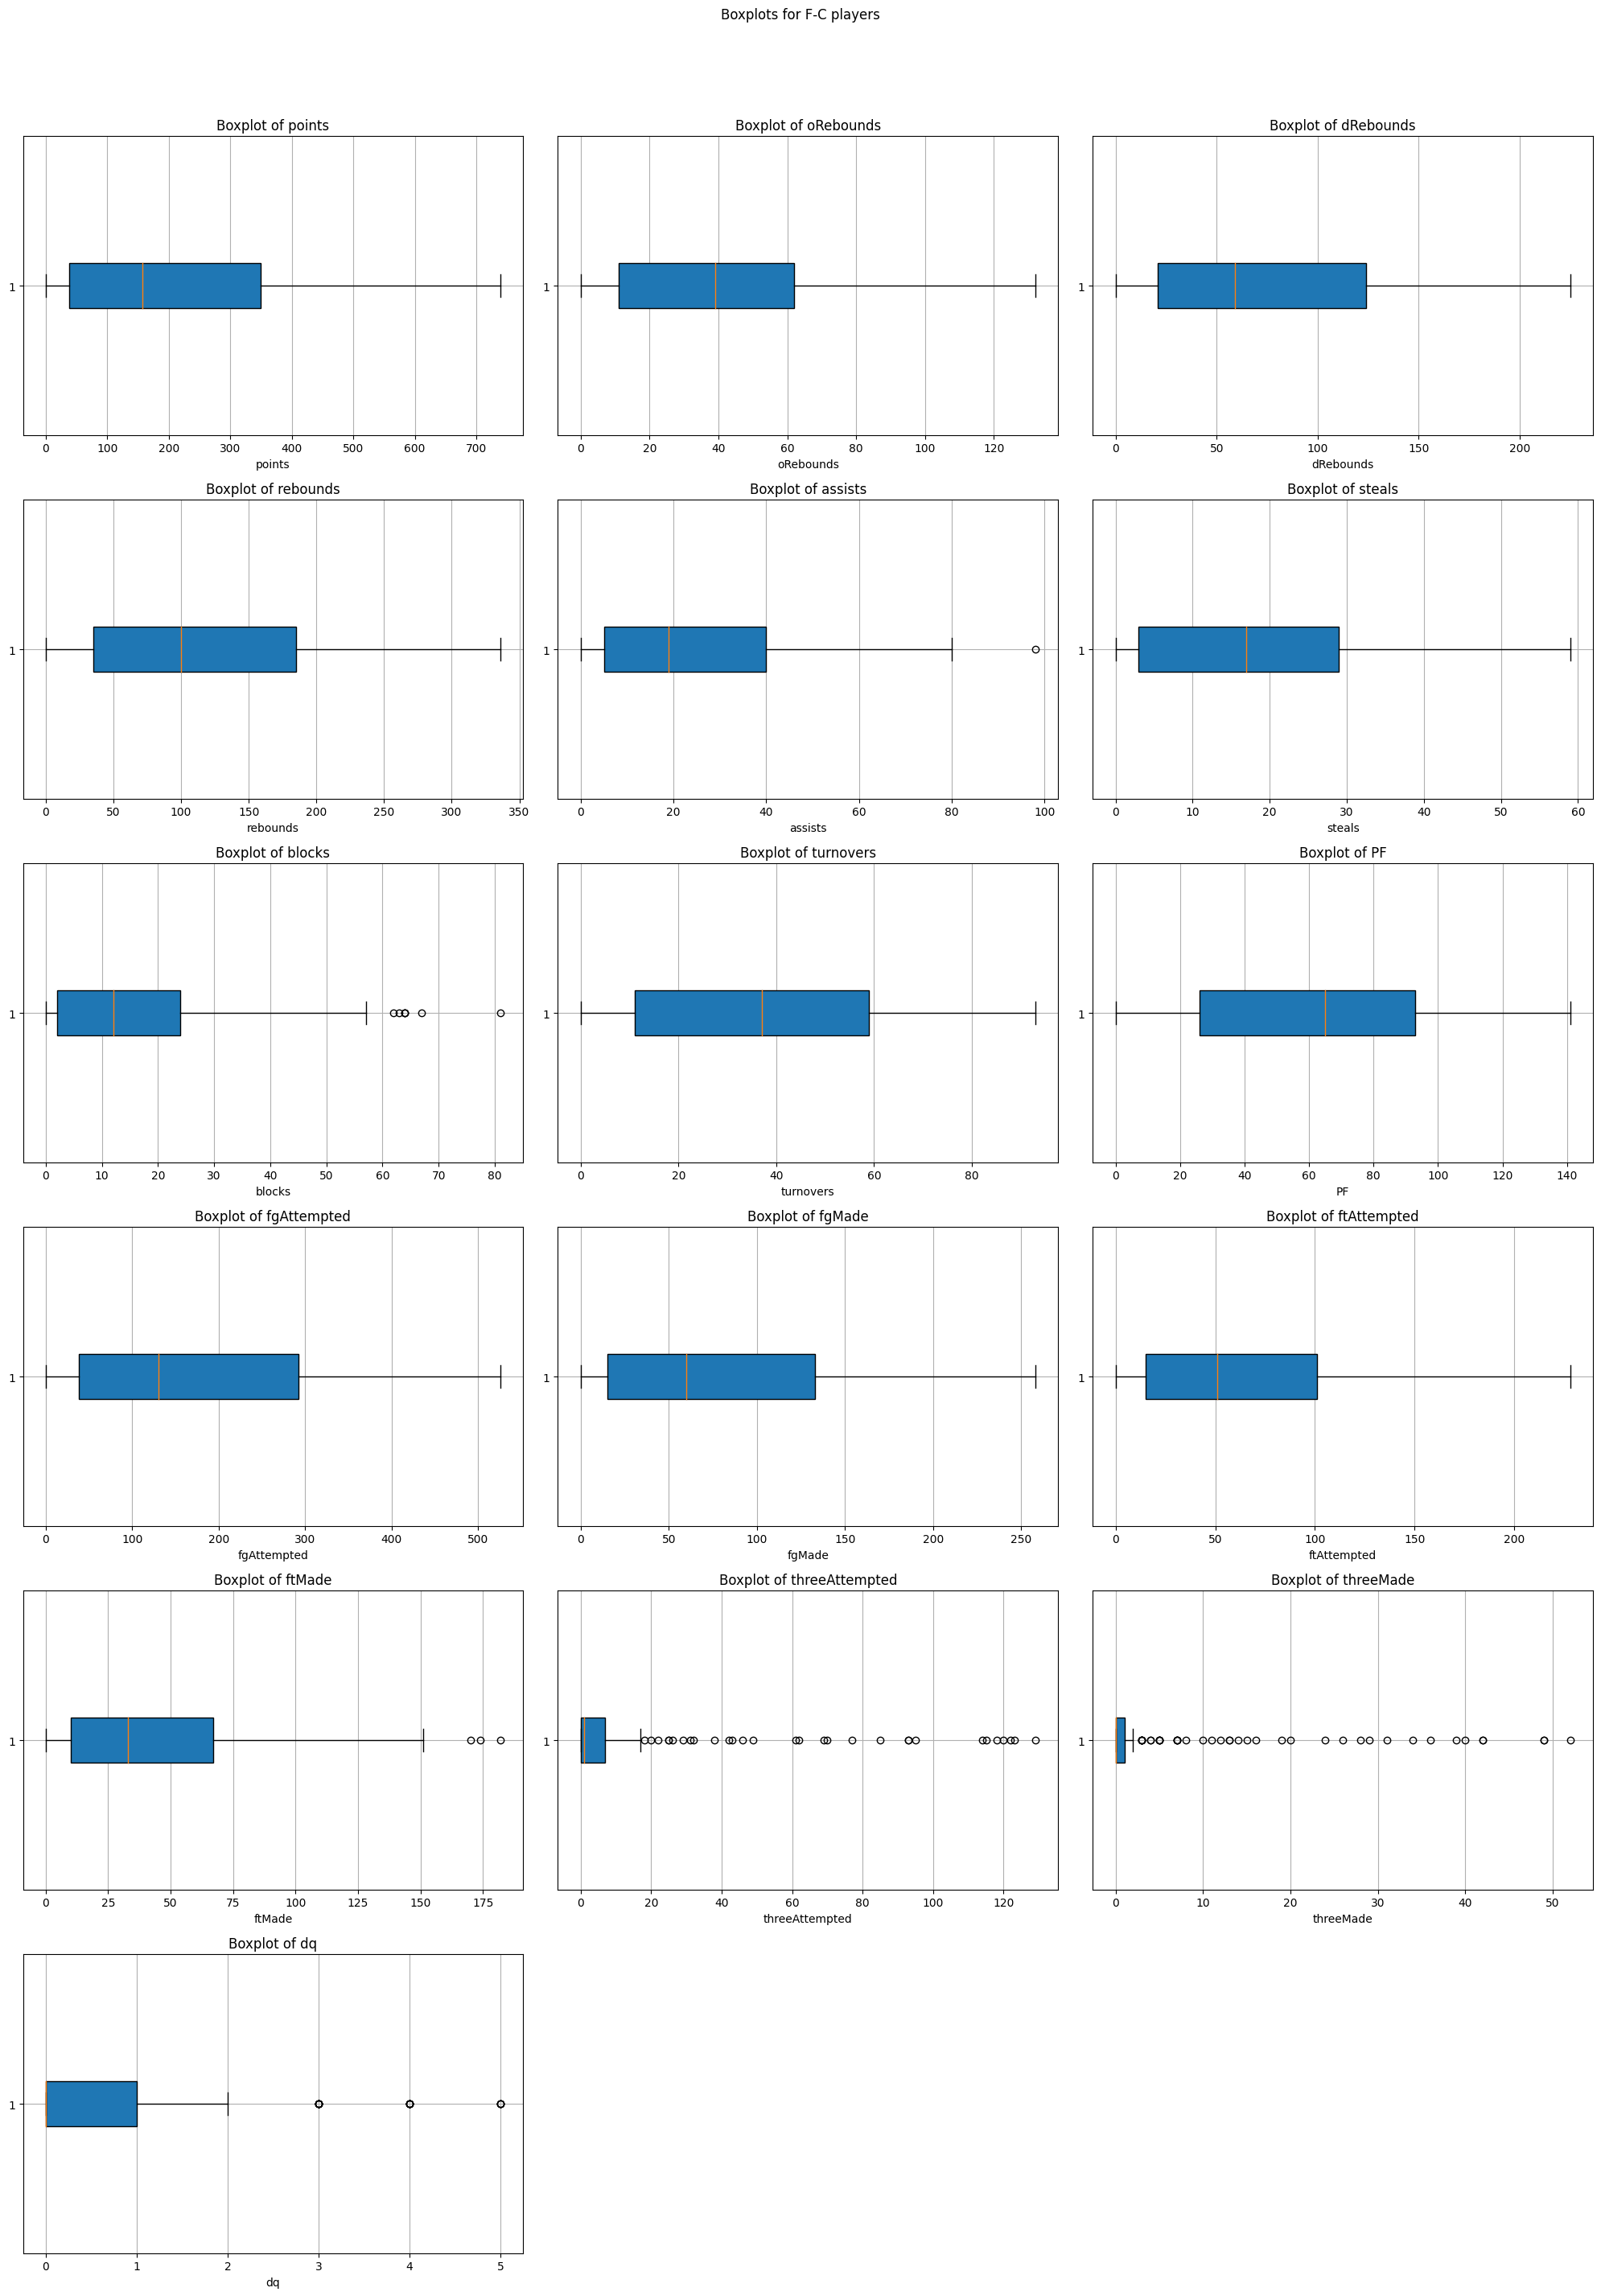

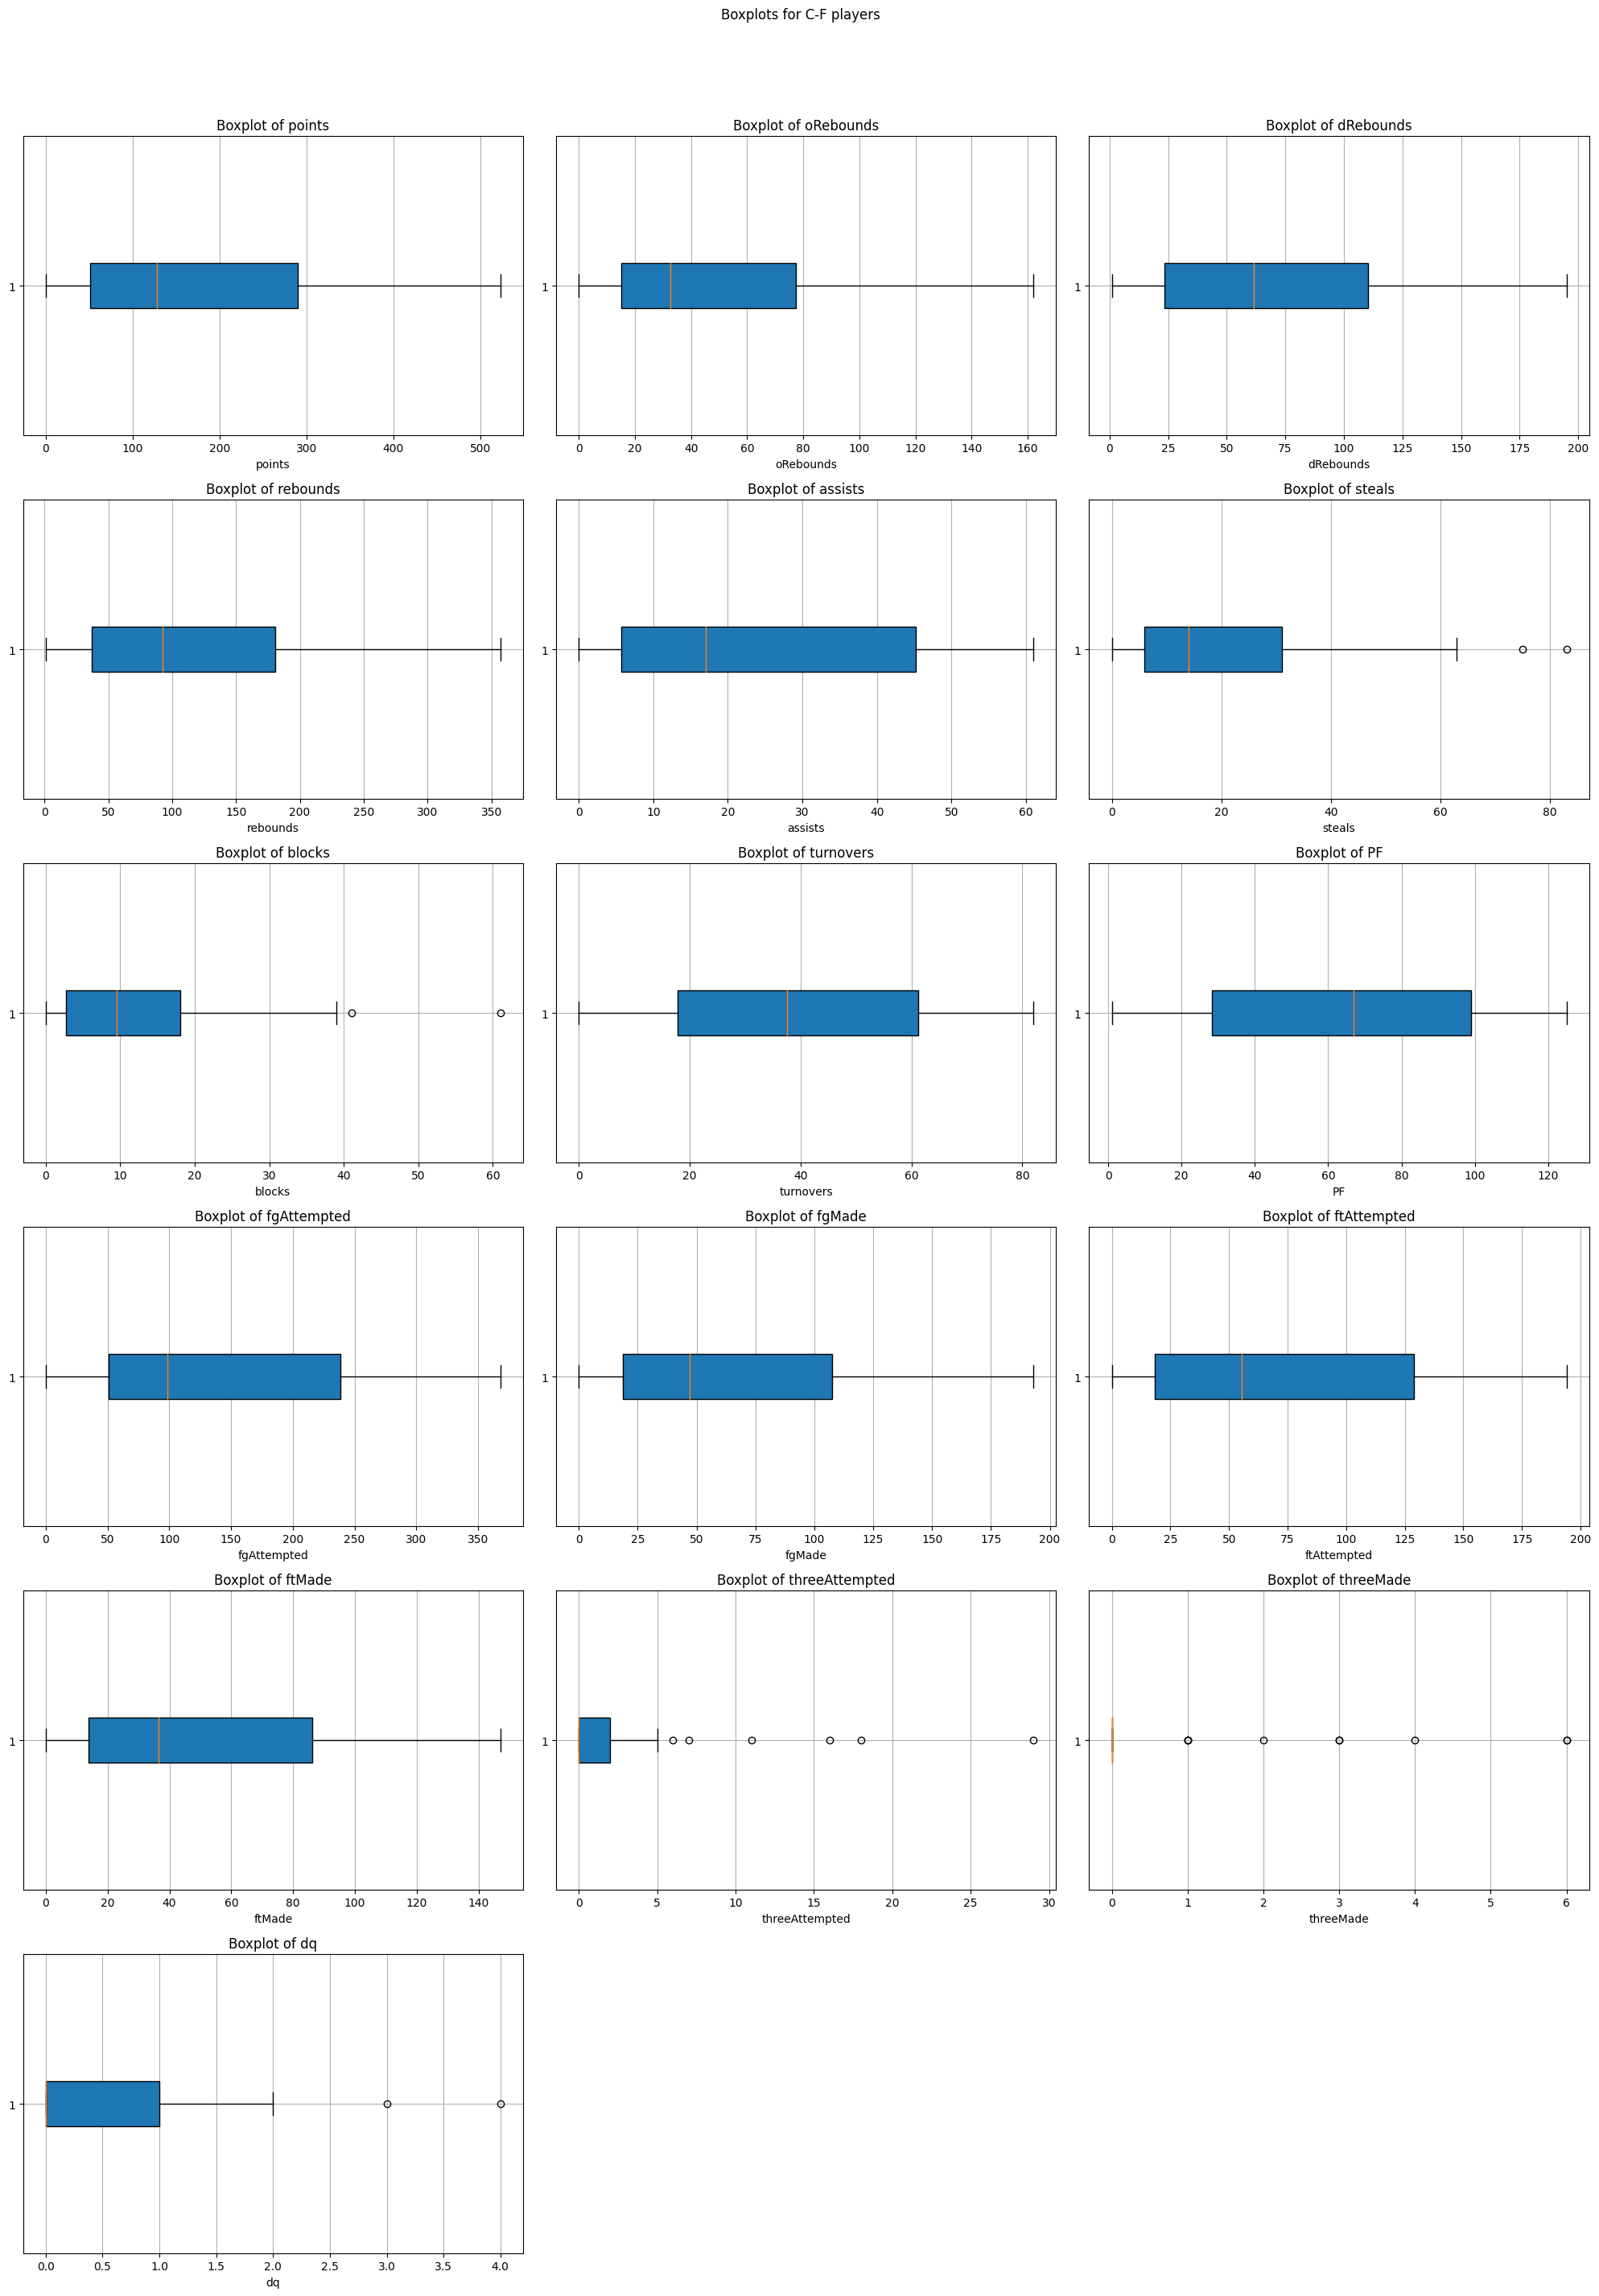

In [24]:
# Plot the outliers per position from the csv_playersTeams

columns = ["points","oRebounds","dRebounds","rebounds","assists","steals","blocks","turnovers","PF","fgAttempted","fgMade","ftAttempted","ftMade","threeAttempted","threeMade","dq"]

# join the csv_playersTeams with the csv_players to get the position of the players

# match the playerID from the csv_playersTeams to the bioID from the csv_players

merged_data_outliers = pd.merge(csv_playersTeams, csv_players, left_on='playerID', right_on='bioID', suffixes=('_player', '_team'))


# Separate the merged_data_outliers per position of the players and print the boxplot to check the outliers of the columns 

for position in merged_data_outliers['pos'].unique():
    position_data = merged_data_outliers[merged_data_outliers['pos'] == position]
    
    # Determine the number of rows and columns for the subplots
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    # Create a figure and a set of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Create boxplots
    for i, column in enumerate(columns):
        axes[i].boxplot(position_data[column].dropna(), vert=False, patch_artist=True)
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_xlabel(column)
        axes[i].grid(True)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.suptitle(f'Boxplots for {position} players')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
